# 1. 모듈 Import 및 데이터 불러오기

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
%matplotlib inline

from statsmodels.tsa.stattools import grangercausalitytests
from sklearn.metrics import mean_squared_error

from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)
plt.rcParams['axes.unicode_minus'] = False

In [ ]:
data = pd.read_csv('../data/최종데이터/for_train_data.csv')

In [ ]:
data.head(3)

,term,emd_nm,em_g_gap,em_g_gap_rate,em_g_avg,em_g_std,resid_reg_pop_gap,resid_reg_pop_gap_rate,resid_reg_pop_avg,resid_reg_pop_std,...,deli_per_use_amt_std,food_per_use_amt_gap,food_per_use_amt_gap_rate,food_per_use_amt_avg,food_per_use_amt_std,temperature,rain,fine_dust,em_g,peak
0,2018-06-01,건입동,3468900,1.016998,45007516,1486514.83,31.0,0.998265,9799.000000,12.68,...,395.39,10855.341526,1.069767,53964.320945,4530.37,21.721667,8.994167,31.633333,48187900,0
1,2018-06-01,남원읍,5900300,1.012975,40838033,2661150.77,66.0,1.003453,19144.000000,26.98,...,367.26,7150.172638,1.044615,34163.932414,3094.34,21.721667,8.994167,31.633333,42287450,0
2,2018-06-01,노형동,24880750,1.013611,259129650,10977885.73,52.0,0.999026,53351.666667,24.51,...,258.08,7942.755643,0.963592,39179.948301,3467.90,21.721667,8.994167,31.633333,272193365,0


# 2. 알수없음 지역 제외

In [ ]:
data.drop(data.loc[data['emd_nm']=='알수없음'].index, inplace=True)

# 3. 학습데이터(2018.01 ~ 2021.04)와 테스트데이터(2021.05 ~ 2021.06)로 분리

In [ ]:
train = data[data['term'].between('2018-01-01','2021-04-01')]
test = data[data['term'].between('2021-05-01','2021-06-01')]

In [ ]:
train.head(3)

,term,emd_nm,em_g_gap,em_g_gap_rate,em_g_avg,em_g_std,resid_reg_pop_gap,resid_reg_pop_gap_rate,resid_reg_pop_avg,resid_reg_pop_std,...,deli_per_use_amt_std,food_per_use_amt_gap,food_per_use_amt_gap_rate,food_per_use_amt_avg,food_per_use_amt_std,temperature,rain,fine_dust,em_g,peak
0,2018-06-01,건입동,3468900,1.016998,45007516,1486514.83,31.0,0.998265,9799.000000,12.68,...,395.39,10855.341526,1.069767,53964.320945,4530.37,21.721667,8.994167,31.633333,48187900,0
1,2018-06-01,남원읍,5900300,1.012975,40838033,2661150.77,66.0,1.003453,19144.000000,26.98,...,367.26,7150.172638,1.044615,34163.932414,3094.34,21.721667,8.994167,31.633333,42287450,0
2,2018-06-01,노형동,24880750,1.013611,259129650,10977885.73,52.0,0.999026,53351.666667,24.51,...,258.08,7942.755643,0.963592,39179.948301,3467.90,21.721667,8.994167,31.633333,272193365,0


In [ ]:
test.head(3)

,term,emd_nm,em_g_gap,em_g_gap_rate,em_g_avg,em_g_std,resid_reg_pop_gap,resid_reg_pop_gap_rate,resid_reg_pop_avg,resid_reg_pop_std,...,deli_per_use_amt_std,food_per_use_amt_gap,food_per_use_amt_gap_rate,food_per_use_amt_avg,food_per_use_amt_std,temperature,rain,fine_dust,em_g,peak
1362,2021-05-01,건입동,8486300,0.775993,34673250,3759516.11,107.0,0.988230,9039.000000,43.73,...,230.88,3504.063539,1.084340,43230.642371,1433.76,18.577419,4.404839,43.010753,38047500,0
1363,2021-05-01,구좌읍,1834800,0.988897,26267000,803686.91,34.0,0.998971,15529.333333,13.89,...,261.51,4914.873727,1.159752,32846.734276,2075.90,18.577419,4.404839,43.010753,34451200,0
1364,2021-05-01,남원읍,4397900,0.927399,57783533,1982365.83,15.0,0.999201,18757.666667,6.24,...,505.22,2901.642632,1.085082,35715.782849,1206.25,18.577419,4.404839,43.010753,59816600,0


In [ ]:
col_list = list(train.columns)
col_list

['term',
 'emd_nm',
 'em_g_gap',
 'em_g_gap_rate',
 'em_g_avg',
 'em_g_std',
 'resid_reg_pop_gap',
 'resid_reg_pop_gap_rate',
 'resid_reg_pop_avg',
 'resid_reg_pop_std',
 'foreign_pop_gap_rate',
 'foreign_pop_std',
 'total_pop_gap',
 'total_pop_gap_rate',
 'total_pop_avg',
 'total_pop_std',
 'f_resid_reg_rate_gap',
 'f_resid_reg_rate_gap_rate',
 'f_resid_reg_rate_avg',
 'f_resid_reg_rate_std',
 'f_foreign_rate_gap',
 'f_foreign_rate_gap_rate',
 'f_foreign_rate_avg',
 'f_foreign_rate_std',
 'f_total_rate_gap',
 'f_total_rate_gap_rate',
 'f_total_rate_avg',
 'f_total_rate_std',
 'floating_resd_rate_gap',
 'floating_resd_rate_gap_rate',
 'floating_resd_rate_avg',
 'floating_resd_rate_std',
 'floating_pop_cnt_gap',
 'floating_pop_cnt_gap_rate',
 'floating_pop_cnt_avg',
 'floating_pop_cnt_std',
 'floating_visit_rate_1020_gap',
 'floating_visit_rate_1020_gap_rate',
 'floating_visit_rate_1020_avg',
 'floating_visit_rate_1020_std',
 'floating_resd_rate_1020_gap',
 'floating_resd_rate_1020_gap_

# 4. gap_rate의 인과관계/상관관계 확인 및 삭제
- 다른거에 비해 안좋게 나오는걸 확인함

## 4.1 em_g / resid_reg_pop / foreign_pop / total_pop

In [ ]:
a = train[['em_g',  
          'em_g_gap', 'em_g_gap_rate', 'em_g_avg', 'em_g_std',
          'resid_reg_pop_gap', 'resid_reg_pop_gap_rate', 'resid_reg_pop_avg', 'resid_reg_pop_std',
          'foreign_pop_gap_rate', 'foreign_pop_std',
         'total_pop_gap', 'total_pop_gap_rate', 'total_pop_avg', 'total_pop_std',]]

<AxesSubplot:>

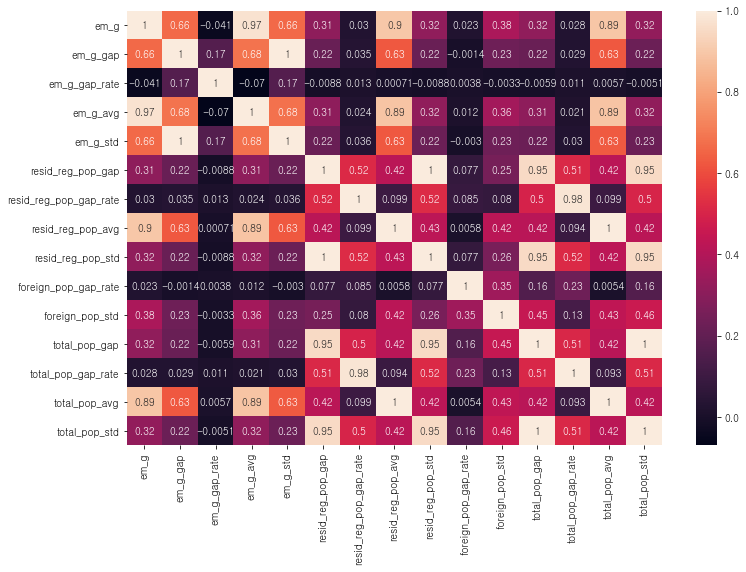

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(a.corr(), annot=True)   

In [ ]:
res = grangercausalitytests(train[['em_g_gap_rate', 'em_g']], maxlag=3)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.6327  , p=0.4265  , df_denom=1358, df_num=1
ssr based chi2 test:   chi2=0.6341  , p=0.4259  , df=1
likelihood ratio test: chi2=0.6339  , p=0.4259  , df=1
parameter F test:         F=0.6327  , p=0.4265  , df_denom=1358, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.2696  , p=0.7638  , df_denom=1355, df_num=2
ssr based chi2 test:   chi2=0.5411  , p=0.7630  , df=2
likelihood ratio test: chi2=0.5410  , p=0.7630  , df=2
parameter F test:         F=0.2696  , p=0.7638  , df_denom=1355, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.8846  , p=0.4484  , df_denom=1352, df_num=3
ssr based chi2 test:   chi2=2.6675  , p=0.4458  , df=3
likelihood ratio test: chi2=2.6648  , p=0.4462  , df=3
parameter F test:         F=0.8846  , p=0.4484  , df_denom=1352, df_num=3


In [ ]:
res = grangercausalitytests(train[['resid_reg_pop_gap_rate', 'em_g']], maxlag=3)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.4820  , p=0.0623  , df_denom=1358, df_num=1
ssr based chi2 test:   chi2=3.4897  , p=0.0618  , df=1
likelihood ratio test: chi2=3.4852  , p=0.0619  , df=1
parameter F test:         F=3.4820  , p=0.0623  , df_denom=1358, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=4.5199  , p=0.0111  , df_denom=1355, df_num=2
ssr based chi2 test:   chi2=9.0732  , p=0.0107  , df=2
likelihood ratio test: chi2=9.0431  , p=0.0109  , df=2
parameter F test:         F=4.5199  , p=0.0111  , df_denom=1355, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=3.1624  , p=0.0238  , df_denom=1352, df_num=3
ssr based chi2 test:   chi2=9.5362  , p=0.0229  , df=3
likelihood ratio test: chi2=9.5029  , p=0.0233  , df=3
parameter F test:         F=3.1624  , p=0.0238  , df_denom=1352, df_num=3


In [ ]:
res = grangercausalitytests(train[['foreign_pop_gap_rate', 'em_g']], maxlag=3)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2516  , p=0.6160  , df_denom=1358, df_num=1
ssr based chi2 test:   chi2=0.2522  , p=0.6155  , df=1
likelihood ratio test: chi2=0.2522  , p=0.6156  , df=1
parameter F test:         F=0.2516  , p=0.6160  , df_denom=1358, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.9569  , p=0.3843  , df_denom=1355, df_num=2
ssr based chi2 test:   chi2=1.9209  , p=0.3827  , df=2
likelihood ratio test: chi2=1.9195  , p=0.3830  , df=2
parameter F test:         F=0.9569  , p=0.3843  , df_denom=1355, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.8533  , p=0.1357  , df_denom=1352, df_num=3
ssr based chi2 test:   chi2=5.5886  , p=0.1334  , df=3
likelihood ratio test: chi2=5.5772  , p=0.1341  , df=3
parameter F test:         F=1.8533  , p=0.1357  , df_denom=1352, df_num=3


In [ ]:
res = grangercausalitytests(train[['total_pop_gap_rate', 'em_g']], maxlag=3)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.3065  , p=0.0692  , df_denom=1358, df_num=1
ssr based chi2 test:   chi2=3.3138  , p=0.0687  , df=1
likelihood ratio test: chi2=3.3098  , p=0.0689  , df=1
parameter F test:         F=3.3065  , p=0.0692  , df_denom=1358, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=3.5533  , p=0.0289  , df_denom=1355, df_num=2
ssr based chi2 test:   chi2=7.1328  , p=0.0283  , df=2
likelihood ratio test: chi2=7.1141  , p=0.0285  , df=2
parameter F test:         F=3.5533  , p=0.0289  , df_denom=1355, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.6491  , p=0.0475  , df_denom=1352, df_num=3
ssr based chi2 test:   chi2=7.9885  , p=0.0462  , df=3
likelihood ratio test: chi2=7.9652  , p=0.0467  , df=3
parameter F test:         F=2.6491  , p=0.0475  , df_denom=1352, df_num=3


## 4.2 f_resid_reg / f_foreign / f_total / floating_resd

In [ ]:
b = train[['em_g',  
          'f_resid_reg_rate_gap', 'f_resid_reg_rate_gap_rate', 'f_resid_reg_rate_avg', 'f_resid_reg_rate_std',
          'f_foreign_rate_gap', 'f_foreign_rate_gap_rate', 'f_foreign_rate_avg', 'f_foreign_rate_std',
          'f_total_rate_gap', 'f_total_rate_gap_rate', 'f_total_rate_avg', 'f_total_rate_std',
          'floating_resd_rate_gap', 'floating_resd_rate_gap_rate', 'floating_resd_rate_avg', 'floating_resd_rate_std']]

<AxesSubplot:>

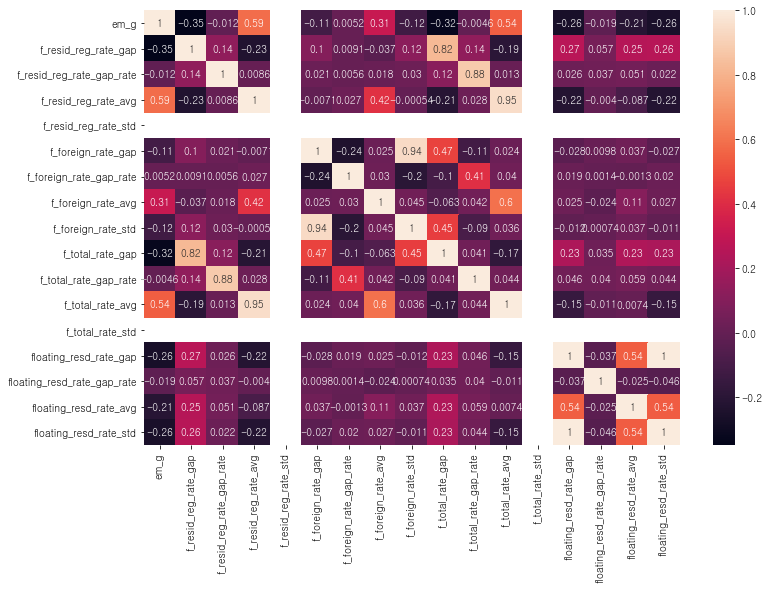

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(b.corr(), annot=True)   

In [ ]:
res = grangercausalitytests(train[['f_resid_reg_rate_gap_rate', 'em_g']], maxlag=3)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0087  , p=0.9257  , df_denom=1358, df_num=1
ssr based chi2 test:   chi2=0.0087  , p=0.9256  , df=1
likelihood ratio test: chi2=0.0087  , p=0.9256  , df=1
parameter F test:         F=0.0087  , p=0.9257  , df_denom=1358, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.2062  , p=0.8137  , df_denom=1355, df_num=2
ssr based chi2 test:   chi2=0.4140  , p=0.8130  , df=2
likelihood ratio test: chi2=0.4139  , p=0.8131  , df=2
parameter F test:         F=0.2062  , p=0.8137  , df_denom=1355, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.5099  , p=0.2102  , df_denom=1352, df_num=3
ssr based chi2 test:   chi2=4.5530  , p=0.2076  , df=3
likelihood ratio test: chi2=4.5454  , p=0.2083  , df=3
parameter F test:         F=1.5099  , p=0.2102  , df_denom=1352, df_num=3


In [ ]:
res = grangercausalitytests(train[['f_foreign_rate_gap_rate', 'em_g']], maxlag=3)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.1714  , p=0.1408  , df_denom=1358, df_num=1
ssr based chi2 test:   chi2=2.1762  , p=0.1402  , df=1
likelihood ratio test: chi2=2.1745  , p=0.1403  , df=1
parameter F test:         F=2.1714  , p=0.1408  , df_denom=1358, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.1071  , p=0.3308  , df_denom=1355, df_num=2
ssr based chi2 test:   chi2=2.2223  , p=0.3292  , df=2
likelihood ratio test: chi2=2.2205  , p=0.3295  , df=2
parameter F test:         F=1.1071  , p=0.3308  , df_denom=1355, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.6425  , p=0.5877  , df_denom=1352, df_num=3
ssr based chi2 test:   chi2=1.9375  , p=0.5855  , df=3
likelihood ratio test: chi2=1.9361  , p=0.5858  , df=3
parameter F test:         F=0.6425  , p=0.5877  , df_denom=1352, df_num=3


In [ ]:
res = grangercausalitytests(train[['f_total_rate_gap_rate', 'em_g']], maxlag=3)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0025  , p=0.9598  , df_denom=1358, df_num=1
ssr based chi2 test:   chi2=0.0026  , p=0.9597  , df=1
likelihood ratio test: chi2=0.0026  , p=0.9597  , df=1
parameter F test:         F=0.0025  , p=0.9598  , df_denom=1358, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.0137  , p=0.9864  , df_denom=1355, df_num=2
ssr based chi2 test:   chi2=0.0275  , p=0.9864  , df=2
likelihood ratio test: chi2=0.0275  , p=0.9864  , df=2
parameter F test:         F=0.0137  , p=0.9864  , df_denom=1355, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.0589  , p=0.3656  , df_denom=1352, df_num=3
ssr based chi2 test:   chi2=3.1931  , p=0.3628  , df=3
likelihood ratio test: chi2=3.1893  , p=0.3633  , df=3
parameter F test:         F=1.0589  , p=0.3655  , df_denom=1352, df_num=3


In [ ]:
res = grangercausalitytests(train[['floating_resd_rate_gap_rate', 'em_g']], maxlag=3)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4150  , p=0.5195  , df_denom=1358, df_num=1
ssr based chi2 test:   chi2=0.4160  , p=0.5190  , df=1
likelihood ratio test: chi2=0.4159  , p=0.5190  , df=1
parameter F test:         F=0.4150  , p=0.5195  , df_denom=1358, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.1246  , p=0.8829  , df_denom=1355, df_num=2
ssr based chi2 test:   chi2=0.2501  , p=0.8825  , df=2
likelihood ratio test: chi2=0.2500  , p=0.8825  , df=2
parameter F test:         F=0.1246  , p=0.8829  , df_denom=1355, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.0315  , p=0.9925  , df_denom=1352, df_num=3
ssr based chi2 test:   chi2=0.0950  , p=0.9924  , df=3
likelihood ratio test: chi2=0.0950  , p=0.9924  , df=3
parameter F test:         F=0.0315  , p=0.9925  , df_denom=1352, df_num=3


## 4.3 floating_pop / floating_visit / floating_resd / floating_visit

In [ ]:
c = train[['em_g',  
 'floating_pop_cnt_gap', 'floating_pop_cnt_gap_rate', 'floating_pop_cnt_avg', 'floating_pop_cnt_std', 
 'floating_visit_rate_1020_gap', 'floating_visit_rate_1020_gap_rate', 'floating_visit_rate_1020_avg', 'floating_visit_rate_1020_std',
  'floating_resd_rate_1020_gap', 'floating_resd_rate_1020_gap_rate', 'floating_resd_rate_1020_avg', 'floating_resd_rate_1020_std',
  'floating_visit_rate_60up_gap', 'floating_visit_rate_60up_gap_rate', 'floating_visit_rate_60up_avg', 'floating_visit_rate_60up_std']]

<AxesSubplot:>

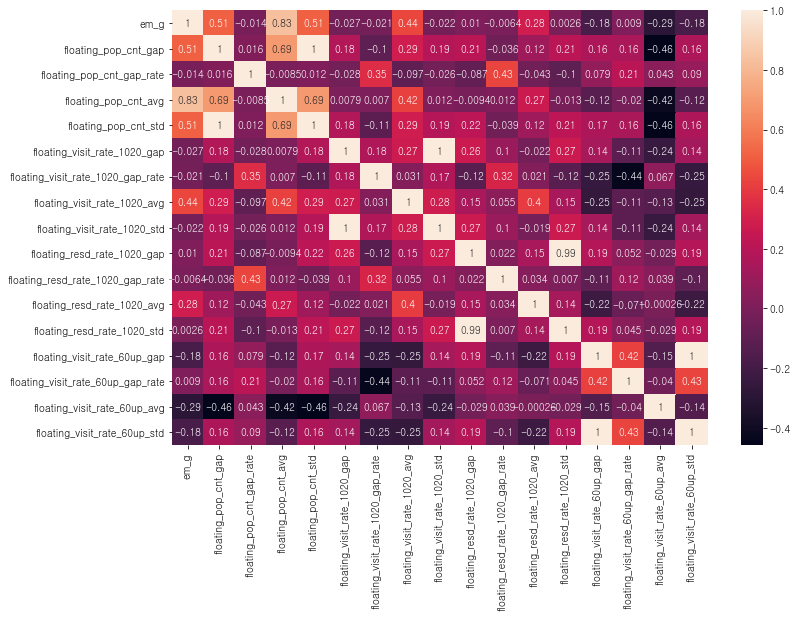

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(c.corr(), annot=True)   

In [ ]:
res = grangercausalitytests(train[['floating_pop_cnt_gap_rate', 'em_g']], maxlag=3)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.7423  , p=0.3891  , df_denom=1358, df_num=1
ssr based chi2 test:   chi2=0.7439  , p=0.3884  , df=1
likelihood ratio test: chi2=0.7437  , p=0.3885  , df=1
parameter F test:         F=0.7423  , p=0.3891  , df_denom=1358, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.1747  , p=0.8398  , df_denom=1355, df_num=2
ssr based chi2 test:   chi2=0.3506  , p=0.8392  , df=2
likelihood ratio test: chi2=0.3506  , p=0.8392  , df=2
parameter F test:         F=0.1747  , p=0.8398  , df_denom=1355, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.1640  , p=0.9206  , df_denom=1352, df_num=3
ssr based chi2 test:   chi2=0.4947  , p=0.9201  , df=3
likelihood ratio test: chi2=0.4946  , p=0.9201  , df=3
parameter F test:         F=0.1640  , p=0.9206  , df_denom=1352, df_num=3


In [ ]:
res = grangercausalitytests(train[['floating_visit_rate_1020_gap_rate', 'em_g']], maxlag=3)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.3328  , p=0.2485  , df_denom=1358, df_num=1
ssr based chi2 test:   chi2=1.3357  , p=0.2478  , df=1
likelihood ratio test: chi2=1.3351  , p=0.2479  , df=1
parameter F test:         F=1.3328  , p=0.2485  , df_denom=1358, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.3123  , p=0.2696  , df_denom=1355, df_num=2
ssr based chi2 test:   chi2=2.6342  , p=0.2679  , df=2
likelihood ratio test: chi2=2.6317  , p=0.2682  , df=2
parameter F test:         F=1.3123  , p=0.2696  , df_denom=1355, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.4951  , p=0.6857  , df_denom=1352, df_num=3
ssr based chi2 test:   chi2=1.4929  , p=0.6839  , df=3
likelihood ratio test: chi2=1.4921  , p=0.6841  , df=3
parameter F test:         F=0.4951  , p=0.6857  , df_denom=1352, df_num=3


In [ ]:
res = grangercausalitytests(train[['floating_resd_rate_1020_gap_rate', 'em_g']], maxlag=3)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0171  , p=0.8959  , df_denom=1358, df_num=1
ssr based chi2 test:   chi2=0.0172  , p=0.8957  , df=1
likelihood ratio test: chi2=0.0172  , p=0.8957  , df=1
parameter F test:         F=0.0171  , p=0.8959  , df_denom=1358, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.3573  , p=0.6996  , df_denom=1355, df_num=2
ssr based chi2 test:   chi2=0.7172  , p=0.6987  , df=2
likelihood ratio test: chi2=0.7170  , p=0.6987  , df=2
parameter F test:         F=0.3573  , p=0.6996  , df_denom=1355, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.2093  , p=0.8900  , df_denom=1352, df_num=3
ssr based chi2 test:   chi2=0.6312  , p=0.8892  , df=3
likelihood ratio test: chi2=0.6311  , p=0.8893  , df=3
parameter F test:         F=0.2093  , p=0.8900  , df_denom=1352, df_num=3


In [ ]:
res = grangercausalitytests(train[['floating_visit_rate_60up_gap_rate', 'em_g']], maxlag=3)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.4435  , p=0.1182  , df_denom=1358, df_num=1
ssr based chi2 test:   chi2=2.4489  , p=0.1176  , df=1
likelihood ratio test: chi2=2.4467  , p=0.1178  , df=1
parameter F test:         F=2.4435  , p=0.1182  , df_denom=1358, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.3159  , p=0.0991  , df_denom=1355, df_num=2
ssr based chi2 test:   chi2=4.6489  , p=0.0978  , df=2
likelihood ratio test: chi2=4.6409  , p=0.0982  , df=2
parameter F test:         F=2.3159  , p=0.0991  , df_denom=1355, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.7484  , p=0.5233  , df_denom=1352, df_num=3
ssr based chi2 test:   chi2=2.2569  , p=0.5208  , df=3
likelihood ratio test: chi2=2.2550  , p=0.5212  , df=3
parameter F test:         F=0.7484  , p=0.5233  , df_denom=1352, df_num=3


## 4.4 floating_resd / floating_f_visit / floating_f_resd / visit_pop_cnt / visit_pop_cnt_sf

In [ ]:
d = train[['em_g',  
 'floating_resd_rate_60up_gap', 'floating_resd_rate_60up_gap_rate', 'floating_resd_rate_60up_avg', 'floating_resd_rate_60up_std',
'floating_f_visit_rate_gap', 'floating_f_visit_rate_gap_rate', 'floating_f_visit_rate_avg', 'floating_f_visit_rate_std',
  'floating_f_resd_rate_gap', 'floating_f_resd_rate_gap_rate', 'floating_f_resd_rate_avg', 'floating_f_resd_rate_std',
  'visit_pop_cnt',
 'visit_pop_cnt_gap_sf', 'visit_pop_cnt_gap_rate_sf', 'visit_pop_cnt_avg_sf', 'visit_pop_cnt_std_sf',]]

<AxesSubplot:>

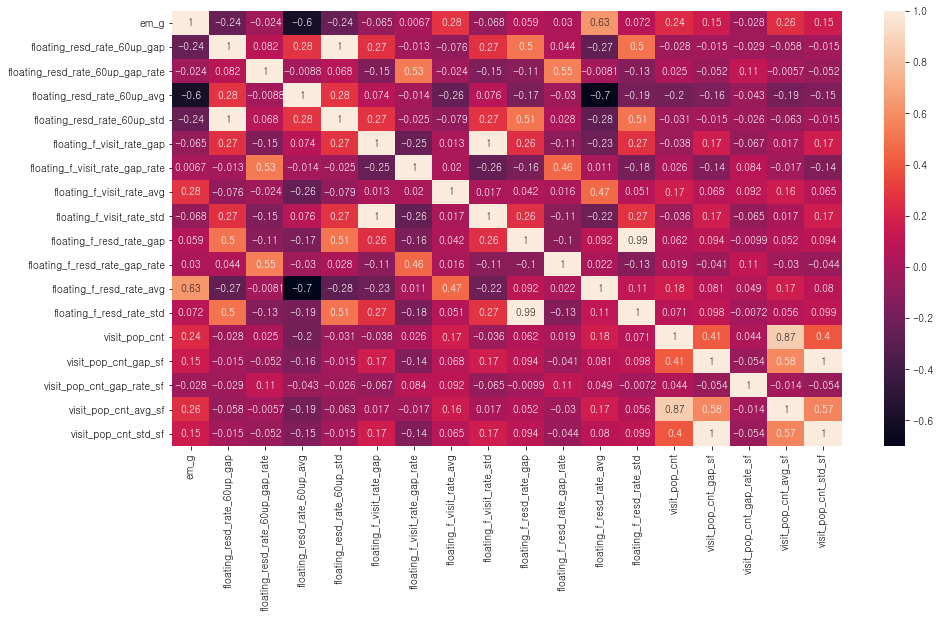

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(d.corr(), annot=True)   

In [ ]:
res = grangercausalitytests(train[['floating_resd_rate_60up_gap_rate', 'em_g']], maxlag=3)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1764  , p=0.6745  , df_denom=1358, df_num=1
ssr based chi2 test:   chi2=0.1768  , p=0.6741  , df=1
likelihood ratio test: chi2=0.1768  , p=0.6741  , df=1
parameter F test:         F=0.1764  , p=0.6745  , df_denom=1358, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.8507  , p=0.1575  , df_denom=1355, df_num=2
ssr based chi2 test:   chi2=3.7151  , p=0.1561  , df=2
likelihood ratio test: chi2=3.7101  , p=0.1564  , df=2
parameter F test:         F=1.8507  , p=0.1575  , df_denom=1355, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.2177  , p=0.3019  , df_denom=1352, df_num=3
ssr based chi2 test:   chi2=3.6719  , p=0.2991  , df=3
likelihood ratio test: chi2=3.6669  , p=0.2997  , df=3
parameter F test:         F=1.2177  , p=0.3019  , df_denom=1352, df_num=3


In [ ]:
res = grangercausalitytests(train[['floating_f_visit_rate_gap_rate', 'em_g']], maxlag=3)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0682  , p=0.7940  , df_denom=1358, df_num=1
ssr based chi2 test:   chi2=0.0683  , p=0.7938  , df=1
likelihood ratio test: chi2=0.0683  , p=0.7938  , df=1
parameter F test:         F=0.0682  , p=0.7940  , df_denom=1358, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.1380  , p=0.8711  , df_denom=1355, df_num=2
ssr based chi2 test:   chi2=0.2771  , p=0.8706  , df=2
likelihood ratio test: chi2=0.2771  , p=0.8706  , df=2
parameter F test:         F=0.1380  , p=0.8711  , df_denom=1355, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.0612  , p=0.9802  , df_denom=1352, df_num=3
ssr based chi2 test:   chi2=0.1845  , p=0.9801  , df=3
likelihood ratio test: chi2=0.1845  , p=0.9801  , df=3
parameter F test:         F=0.0612  , p=0.9802  , df_denom=1352, df_num=3


In [ ]:
res = grangercausalitytests(train[['floating_f_resd_rate_gap_rate', 'em_g']], maxlag=3)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.7678  , p=0.1839  , df_denom=1358, df_num=1
ssr based chi2 test:   chi2=1.7717  , p=0.1832  , df=1
likelihood ratio test: chi2=1.7705  , p=0.1833  , df=1
parameter F test:         F=1.7678  , p=0.1839  , df_denom=1358, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.6928  , p=0.5003  , df_denom=1355, df_num=2
ssr based chi2 test:   chi2=1.3908  , p=0.4989  , df=2
likelihood ratio test: chi2=1.3901  , p=0.4991  , df=2
parameter F test:         F=0.6928  , p=0.5003  , df_denom=1355, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.6109  , p=0.6080  , df_denom=1352, df_num=3
ssr based chi2 test:   chi2=1.8422  , p=0.6058  , df=3
likelihood ratio test: chi2=1.8410  , p=0.6061  , df=3
parameter F test:         F=0.6109  , p=0.6080  , df_denom=1352, df_num=3


In [ ]:
res = grangercausalitytests(train[['visit_pop_cnt_gap_rate_sf', 'em_g']], maxlag=3)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2663  , p=0.6059  , df_denom=1358, df_num=1
ssr based chi2 test:   chi2=0.2669  , p=0.6054  , df=1
likelihood ratio test: chi2=0.2669  , p=0.6054  , df=1
parameter F test:         F=0.2663  , p=0.6059  , df_denom=1358, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.3168  , p=0.7286  , df_denom=1355, df_num=2
ssr based chi2 test:   chi2=0.6359  , p=0.7277  , df=2
likelihood ratio test: chi2=0.6357  , p=0.7277  , df=2
parameter F test:         F=0.3168  , p=0.7286  , df_denom=1355, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.2123  , p=0.8879  , df_denom=1352, df_num=3
ssr based chi2 test:   chi2=0.6403  , p=0.8871  , df=3
likelihood ratio test: chi2=0.6401  , p=0.8872  , df=3
parameter F test:         F=0.2123  , p=0.8879  , df_denom=1352, df_num=3


### rewo_pop_cnt_CVU / rewo_pop_cnt_ETC / visit_pop_cnt_CVU / visit_pop_cnt_ETC

In [ ]:
e = train[['em_g',  
 'rewo_pop_cnt_CVU_lf_gap', 'rewo_pop_cnt_CVU_lf_gap_rate', 'rewo_pop_cnt_CVU_lf_avg', 'rewo_pop_cnt_CVU_lf_std',
  'rewo_pop_cnt_ETC_lf_gap', 'rewo_pop_cnt_ETC_lf_gap_rate', 'rewo_pop_cnt_ETC_lf_avg', 'rewo_pop_cnt_ETC_lf_std',
  'visit_pop_cnt_CVU_lf_gap', 'visit_pop_cnt_CVU_lf_gap_rate', 'visit_pop_cnt_CVU_lf_avg', 'visit_pop_cnt_CVU_lf_std',
  'visit_pop_cnt_ETC_lf_gap', 'visit_pop_cnt_ETC_lf_gap_rate', 'visit_pop_cnt_ETC_lf_avg', 'visit_pop_cnt_ETC_lf_std']]

<AxesSubplot:>

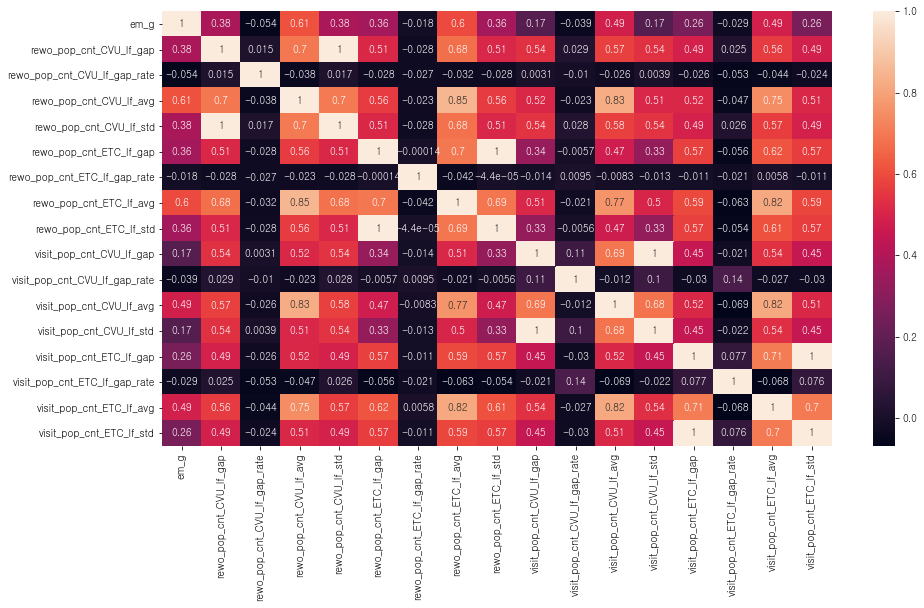

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(e.corr(), annot=True)   

In [ ]:
res = grangercausalitytests(train[['rewo_pop_cnt_CVU_lf_gap_rate', 'em_g']], maxlag=3)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4553  , p=0.4999  , df_denom=1358, df_num=1
ssr based chi2 test:   chi2=0.4563  , p=0.4993  , df=1
likelihood ratio test: chi2=0.4563  , p=0.4994  , df=1
parameter F test:         F=0.4553  , p=0.4999  , df_denom=1358, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.2358  , p=0.7900  , df_denom=1355, df_num=2
ssr based chi2 test:   chi2=0.4733  , p=0.7893  , df=2
likelihood ratio test: chi2=0.4732  , p=0.7893  , df=2
parameter F test:         F=0.2358  , p=0.7900  , df_denom=1355, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.8327  , p=0.4759  , df_denom=1352, df_num=3
ssr based chi2 test:   chi2=2.5110  , p=0.4733  , df=3
likelihood ratio test: chi2=2.5087  , p=0.4737  , df=3
parameter F test:         F=0.8327  , p=0.4759  , df_denom=1352, df_num=3


In [ ]:
res = grangercausalitytests(train[['rewo_pop_cnt_ETC_lf_gap_rate', 'em_g']], maxlag=3)

ValueError: x contains NaN or inf values.

In [ ]:
res = grangercausalitytests(train[['visit_pop_cnt_CVU_lf_gap_rate', 'em_g']], maxlag=3)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1491  , p=0.6995  , df_denom=1358, df_num=1
ssr based chi2 test:   chi2=0.1494  , p=0.6991  , df=1
likelihood ratio test: chi2=0.1494  , p=0.6991  , df=1
parameter F test:         F=0.1491  , p=0.6995  , df_denom=1358, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.4120  , p=0.6624  , df_denom=1355, df_num=2
ssr based chi2 test:   chi2=0.8270  , p=0.6613  , df=2
likelihood ratio test: chi2=0.8268  , p=0.6614  , df=2
parameter F test:         F=0.4120  , p=0.6624  , df_denom=1355, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.2915  , p=0.8315  , df_denom=1352, df_num=3
ssr based chi2 test:   chi2=0.8791  , p=0.8305  , df=3
likelihood ratio test: chi2=0.8788  , p=0.8305  , df=3
parameter F test:         F=0.2915  , p=0.8315  , df_denom=1352, df_num=3


In [ ]:
res = grangercausalitytests(train[['visit_pop_cnt_ETC_lf_gap_rate', 'em_g']], maxlag=3)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0324  , p=0.8572  , df_denom=1358, df_num=1
ssr based chi2 test:   chi2=0.0324  , p=0.8571  , df=1
likelihood ratio test: chi2=0.0324  , p=0.8571  , df=1
parameter F test:         F=0.0324  , p=0.8572  , df_denom=1358, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.6600  , p=0.1905  , df_denom=1355, df_num=2
ssr based chi2 test:   chi2=3.3323  , p=0.1890  , df=2
likelihood ratio test: chi2=3.3283  , p=0.1894  , df=2
parameter F test:         F=1.6600  , p=0.1905  , df_denom=1355, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.2987  , p=0.2734  , df_denom=1352, df_num=3
ssr based chi2 test:   chi2=3.9163  , p=0.2706  , df=3
likelihood ratio test: chi2=3.9106  , p=0.2713  , df=3
parameter F test:         F=1.2987  , p=0.2734  , df_denom=1352, df_num=3


## 4.5 floating_pop_cnt_CVU_lf / floating_pop_cnt_ETC_lf / floating_pop_cnt_lf / visit_rate_CVU_lf

In [ ]:
f = train[['em_g',  
 'floating_pop_cnt_CVU_lf_gap', 'floating_pop_cnt_CVU_lf_gap_rate', 'floating_pop_cnt_CVU_lf_avg', 'floating_pop_cnt_CVU_lf_std',
  'floating_pop_cnt_ETC_lf_gap', 'floating_pop_cnt_ETC_lf_gap_rate', 'floating_pop_cnt_ETC_lf_avg', 'floating_pop_cnt_ETC_lf_std',
  'floating_pop_cnt_lf_gap', 'floating_pop_cnt_lf_gap_rate', 'floating_pop_cnt_lf_avg', 'floating_pop_cnt_lf_std',
  'visit_rate_CVU_lf_gap', 'visit_rate_CVU_lf_gap_rate', 'visit_rate_CVU_lf_avg', 'visit_rate_CVU_lf_std']]

<AxesSubplot:>

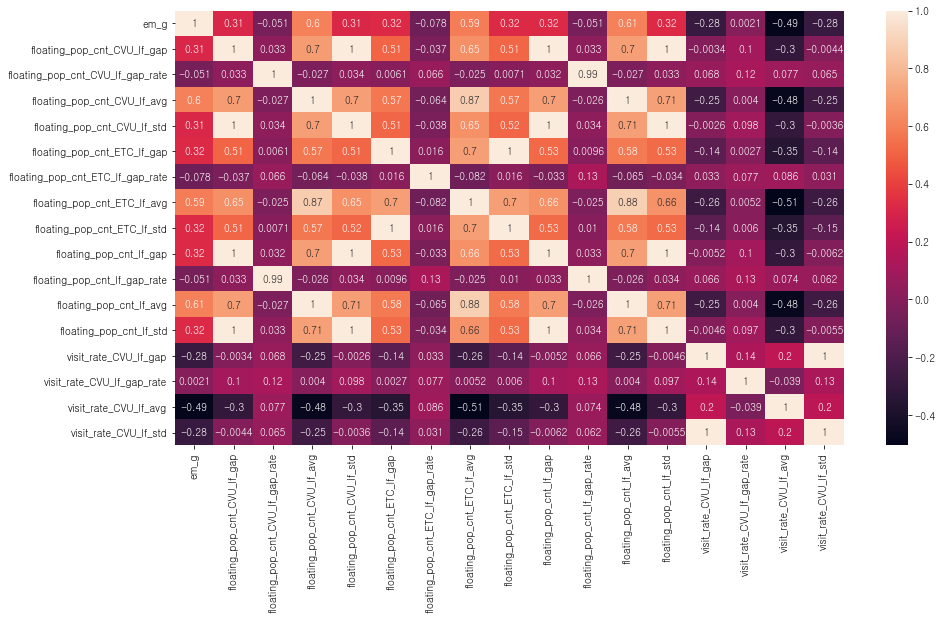

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(f.corr(), annot=True)   

In [ ]:
res = grangercausalitytests(train[['floating_pop_cnt_CVU_lf_gap_rate', 'em_g']], maxlag=3)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3494  , p=0.5546  , df_denom=1358, df_num=1
ssr based chi2 test:   chi2=0.3501  , p=0.5540  , df=1
likelihood ratio test: chi2=0.3501  , p=0.5541  , df=1
parameter F test:         F=0.3494  , p=0.5546  , df_denom=1358, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.7574  , p=0.4691  , df_denom=1355, df_num=2
ssr based chi2 test:   chi2=1.5204  , p=0.4676  , df=2
likelihood ratio test: chi2=1.5195  , p=0.4678  , df=2
parameter F test:         F=0.7574  , p=0.4691  , df_denom=1355, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.2132  , p=0.3035  , df_denom=1352, df_num=3
ssr based chi2 test:   chi2=3.6586  , p=0.3008  , df=3
likelihood ratio test: chi2=3.6537  , p=0.3014  , df=3
parameter F test:         F=1.2132  , p=0.3035  , df_denom=1352, df_num=3


In [ ]:
res = grangercausalitytests(train[['floating_pop_cnt_ETC_lf_gap_rate', 'em_g']], maxlag=3)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.0935  , p=0.2959  , df_denom=1358, df_num=1
ssr based chi2 test:   chi2=1.0959  , p=0.2952  , df=1
likelihood ratio test: chi2=1.0954  , p=0.2953  , df=1
parameter F test:         F=1.0935  , p=0.2959  , df_denom=1358, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.3391  , p=0.0968  , df_denom=1355, df_num=2
ssr based chi2 test:   chi2=4.6955  , p=0.0956  , df=2
likelihood ratio test: chi2=4.6875  , p=0.0960  , df=2
parameter F test:         F=2.3391  , p=0.0968  , df_denom=1355, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.7128  , p=0.1625  , df_denom=1352, df_num=3
ssr based chi2 test:   chi2=5.1650  , p=0.1601  , df=3
likelihood ratio test: chi2=5.1552  , p=0.1608  , df=3
parameter F test:         F=1.7128  , p=0.1625  , df_denom=1352, df_num=3


In [ ]:
res = grangercausalitytests(train[['floating_pop_cnt_lf_gap_rate', 'em_g']], maxlag=3)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3650  , p=0.5458  , df_denom=1358, df_num=1
ssr based chi2 test:   chi2=0.3659  , p=0.5453  , df=1
likelihood ratio test: chi2=0.3658  , p=0.5453  , df=1
parameter F test:         F=0.3650  , p=0.5458  , df_denom=1358, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.8910  , p=0.4105  , df_denom=1355, df_num=2
ssr based chi2 test:   chi2=1.7886  , p=0.4089  , df=2
likelihood ratio test: chi2=1.7874  , p=0.4091  , df=2
parameter F test:         F=0.8910  , p=0.4105  , df_denom=1355, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.3206  , p=0.2661  , df_denom=1352, df_num=3
ssr based chi2 test:   chi2=3.9824  , p=0.2634  , df=3
likelihood ratio test: chi2=3.9765  , p=0.2640  , df=3
parameter F test:         F=1.3206  , p=0.2661  , df_denom=1352, df_num=3


In [ ]:
res = grangercausalitytests(train[['visit_rate_CVU_lf_gap_rate', 'em_g']], maxlag=3)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0090  , p=0.9246  , df_denom=1358, df_num=1
ssr based chi2 test:   chi2=0.0090  , p=0.9245  , df=1
likelihood ratio test: chi2=0.0090  , p=0.9245  , df=1
parameter F test:         F=0.0090  , p=0.9246  , df_denom=1358, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.0847  , p=0.9188  , df_denom=1355, df_num=2
ssr based chi2 test:   chi2=0.1700  , p=0.9185  , df=2
likelihood ratio test: chi2=0.1699  , p=0.9185  , df=2
parameter F test:         F=0.0847  , p=0.9188  , df_denom=1355, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.0651  , p=0.9783  , df_denom=1352, df_num=3
ssr based chi2 test:   chi2=0.1964  , p=0.9782  , df=3
likelihood ratio test: chi2=0.1964  , p=0.9782  , df=3
parameter F test:         F=0.0651  , p=0.9783  , df_denom=1352, df_num=3


## 4.6 visit_rate_ETC_lf / agri_use_amt / mart_use_amt/ deli_use_amt

In [ ]:
g = train[['em_g',  
 'visit_rate_ETC_lf_gap', 'visit_rate_ETC_lf_gap_rate', 'visit_rate_ETC_lf_avg', 'visit_rate_ETC_lf_std',
  'agri_use_amt_gap', 'agri_use_amt_gap_rate', 'agri_use_amt_avg', 'agri_use_amt_std',
  'mart_use_amt_gap', 'mart_use_amt_gap_rate', 'mart_use_amt_avg', 'mart_use_amt_std',
  'deli_use_amt_gap', 'deli_use_amt_gap_rate', 'deli_use_amt_avg', 'deli_use_amt_std']]

<AxesSubplot:>

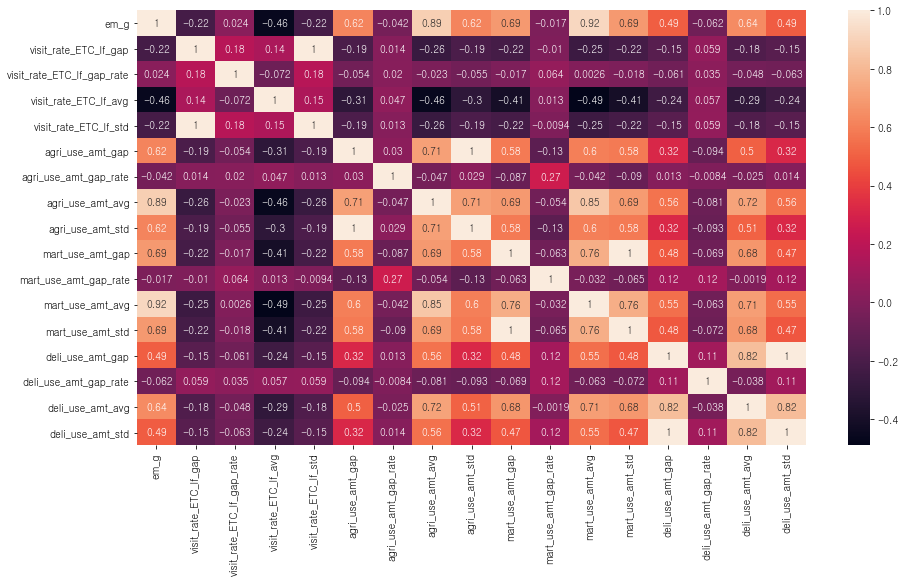

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(g.corr(), annot=True)   

In [ ]:
res = grangercausalitytests(train[['visit_rate_ETC_lf_gap_rate', 'em_g']], maxlag=3)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.2725  , p=0.2595  , df_denom=1358, df_num=1
ssr based chi2 test:   chi2=1.2753  , p=0.2588  , df=1
likelihood ratio test: chi2=1.2747  , p=0.2589  , df=1
parameter F test:         F=1.2725  , p=0.2595  , df_denom=1358, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.7173  , p=0.4882  , df_denom=1355, df_num=2
ssr based chi2 test:   chi2=1.4400  , p=0.4868  , df=2
likelihood ratio test: chi2=1.4392  , p=0.4869  , df=2
parameter F test:         F=0.7173  , p=0.4882  , df_denom=1355, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.4769  , p=0.6984  , df_denom=1352, df_num=3
ssr based chi2 test:   chi2=1.4380  , p=0.6966  , df=3
likelihood ratio test: chi2=1.4373  , p=0.6968  , df=3
parameter F test:         F=0.4769  , p=0.6984  , df_denom=1352, df_num=3


In [ ]:
res = grangercausalitytests(train[['agri_use_amt_gap_rate', 'em_g']], maxlag=3)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.4447  , p=0.2296  , df_denom=1358, df_num=1
ssr based chi2 test:   chi2=1.4479  , p=0.2289  , df=1
likelihood ratio test: chi2=1.4471  , p=0.2290  , df=1
parameter F test:         F=1.4447  , p=0.2296  , df_denom=1358, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.6103  , p=0.0739  , df_denom=1355, df_num=2
ssr based chi2 test:   chi2=5.2398  , p=0.0728  , df=2
likelihood ratio test: chi2=5.2297  , p=0.0732  , df=2
parameter F test:         F=2.6103  , p=0.0739  , df_denom=1355, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.6591  , p=0.1740  , df_denom=1352, df_num=3
ssr based chi2 test:   chi2=5.0029  , p=0.1716  , df=3
likelihood ratio test: chi2=4.9937  , p=0.1723  , df=3
parameter F test:         F=1.6591  , p=0.1740  , df_denom=1352, df_num=3


In [ ]:
res = grangercausalitytests(train[['mart_use_amt_gap_rate', 'em_g']], maxlag=3)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.7500  , p=0.3866  , df_denom=1358, df_num=1
ssr based chi2 test:   chi2=0.7517  , p=0.3859  , df=1
likelihood ratio test: chi2=0.7515  , p=0.3860  , df=1
parameter F test:         F=0.7500  , p=0.3866  , df_denom=1358, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.4316  , p=0.2393  , df_denom=1355, df_num=2
ssr based chi2 test:   chi2=2.8738  , p=0.2377  , df=2
likelihood ratio test: chi2=2.8708  , p=0.2380  , df=2
parameter F test:         F=1.4316  , p=0.2393  , df_denom=1355, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.9170  , p=0.4319  , df_denom=1352, df_num=3
ssr based chi2 test:   chi2=2.7652  , p=0.4293  , df=3
likelihood ratio test: chi2=2.7624  , p=0.4297  , df=3
parameter F test:         F=0.9170  , p=0.4319  , df_denom=1352, df_num=3


In [ ]:
res = grangercausalitytests(train[['deli_use_amt_gap_rate', 'em_g']], maxlag=3)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=6.4530  , p=0.0112  , df_denom=1358, df_num=1
ssr based chi2 test:   chi2=6.4672  , p=0.0110  , df=1
likelihood ratio test: chi2=6.4519  , p=0.0111  , df=1
parameter F test:         F=6.4530  , p=0.0112  , df_denom=1358, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=4.2759  , p=0.0141  , df_denom=1355, df_num=2
ssr based chi2 test:   chi2=8.5834  , p=0.0137  , df=2
likelihood ratio test: chi2=8.5565  , p=0.0139  , df=2
parameter F test:         F=4.2759  , p=0.0141  , df_denom=1355, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.9045  , p=0.0337  , df_denom=1352, df_num=3
ssr based chi2 test:   chi2=8.7585  , p=0.0327  , df=3
likelihood ratio test: chi2=8.7304  , p=0.0331  , df=3
parameter F test:         F=2.9045  , p=0.0337  , df_denom=1352, df_num=3


## 4.7 food_use_amt / agri_per_use_amt / mart_per_use_amt / deli_per_use_amt

In [ ]:
h = train[['em_g',  
 'food_use_amt_gap', 'food_use_amt_gap_rate', 'food_use_amt_avg', 'food_use_amt_std',
  'agri_per_use_amt_gap', 'agri_per_use_amt_gap_rate', 'agri_per_use_amt_avg', 'agri_per_use_amt_std',
  'mart_per_use_amt_gap', 'mart_per_use_amt_gap_rate', 'mart_per_use_amt_avg', 'mart_per_use_amt_std',
  'deli_per_use_amt_gap', 'deli_per_use_amt_gap_rate', 'deli_per_use_amt_avg', 'deli_per_use_amt_std']]

<AxesSubplot:>

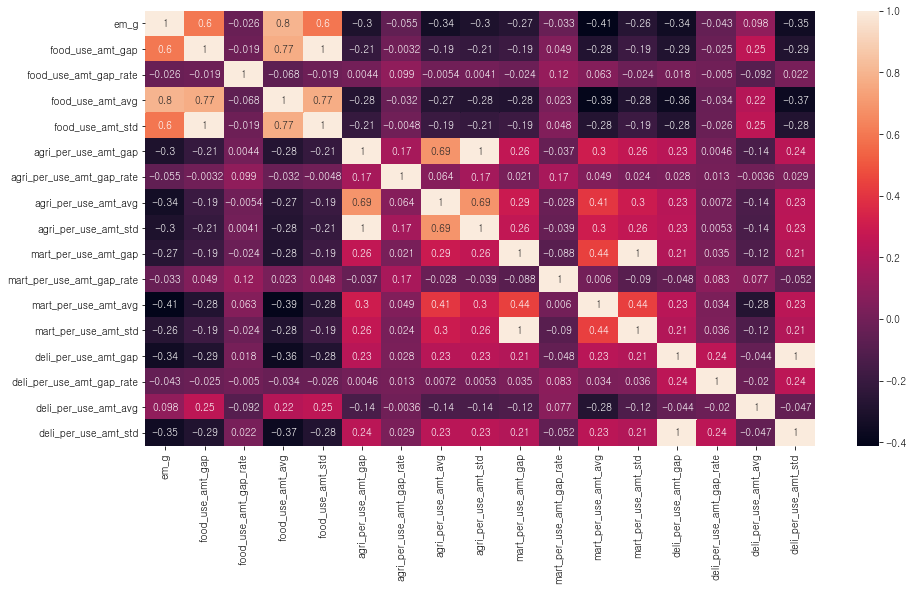

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(h.corr(), annot=True)   

In [ ]:
res = grangercausalitytests(train[['food_use_amt_gap_rate', 'em_g']], maxlag=3)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.3680  , p=0.2424  , df_denom=1358, df_num=1
ssr based chi2 test:   chi2=1.3710  , p=0.2416  , df=1
likelihood ratio test: chi2=1.3703  , p=0.2418  , df=1
parameter F test:         F=1.3680  , p=0.2424  , df_denom=1358, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.7640  , p=0.4660  , df_denom=1355, df_num=2
ssr based chi2 test:   chi2=1.5336  , p=0.4645  , df=2
likelihood ratio test: chi2=1.5328  , p=0.4647  , df=2
parameter F test:         F=0.7640  , p=0.4660  , df_denom=1355, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.4524  , p=0.7157  , df_denom=1352, df_num=3
ssr based chi2 test:   chi2=1.3642  , p=0.7140  , df=3
likelihood ratio test: chi2=1.3635  , p=0.7141  , df=3
parameter F test:         F=0.4524  , p=0.7157  , df_denom=1352, df_num=3


In [ ]:
res = grangercausalitytests(train[['agri_per_use_amt_gap_rate', 'em_g']], maxlag=3)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.5360  , p=0.4642  , df_denom=1358, df_num=1
ssr based chi2 test:   chi2=0.5372  , p=0.4636  , df=1
likelihood ratio test: chi2=0.5371  , p=0.4636  , df=1
parameter F test:         F=0.5360  , p=0.4642  , df_denom=1358, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.8676  , p=0.0572  , df_denom=1355, df_num=2
ssr based chi2 test:   chi2=5.7564  , p=0.0562  , df=2
likelihood ratio test: chi2=5.7443  , p=0.0566  , df=2
parameter F test:         F=2.8676  , p=0.0572  , df_denom=1355, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.9191  , p=0.1246  , df_denom=1352, df_num=3
ssr based chi2 test:   chi2=5.7871  , p=0.1224  , df=3
likelihood ratio test: chi2=5.7748  , p=0.1231  , df=3
parameter F test:         F=1.9191  , p=0.1246  , df_denom=1352, df_num=3


In [ ]:
res = grangercausalitytests(train[['mart_per_use_amt_gap_rate', 'em_g']], maxlag=3)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0101  , p=0.9199  , df_denom=1358, df_num=1
ssr based chi2 test:   chi2=0.0101  , p=0.9198  , df=1
likelihood ratio test: chi2=0.0101  , p=0.9198  , df=1
parameter F test:         F=0.0101  , p=0.9199  , df_denom=1358, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.1179  , p=0.8888  , df_denom=1355, df_num=2
ssr based chi2 test:   chi2=0.2367  , p=0.8884  , df=2
likelihood ratio test: chi2=0.2366  , p=0.8884  , df=2
parameter F test:         F=0.1179  , p=0.8888  , df_denom=1355, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.0592  , p=0.9811  , df_denom=1352, df_num=3
ssr based chi2 test:   chi2=0.1784  , p=0.9810  , df=3
likelihood ratio test: chi2=0.1784  , p=0.9810  , df=3
parameter F test:         F=0.0592  , p=0.9811  , df_denom=1352, df_num=3


In [ ]:
res = grangercausalitytests(train[['deli_per_use_amt_gap_rate', 'em_g']], maxlag=3)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0375  , p=0.8466  , df_denom=1358, df_num=1
ssr based chi2 test:   chi2=0.0375  , p=0.8464  , df=1
likelihood ratio test: chi2=0.0375  , p=0.8464  , df=1
parameter F test:         F=0.0375  , p=0.8466  , df_denom=1358, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.2542  , p=0.7756  , df_denom=1355, df_num=2
ssr based chi2 test:   chi2=0.5103  , p=0.7748  , df=2
likelihood ratio test: chi2=0.5102  , p=0.7748  , df=2
parameter F test:         F=0.2542  , p=0.7756  , df_denom=1355, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.2372  , p=0.8705  , df_denom=1352, df_num=3
ssr based chi2 test:   chi2=0.7153  , p=0.8696  , df=3
likelihood ratio test: chi2=0.7151  , p=0.8696  , df=3
parameter F test:         F=0.2372  , p=0.8705  , df_denom=1352, df_num=3


## 4.8 food_per_use_amt /   'temperature', 'rain', 'fine_dust',  'peak'

In [ ]:
i = train[['em_g',  
 'food_per_use_amt_gap', 'food_per_use_amt_gap_rate', 'food_per_use_amt_avg', 'food_per_use_amt_std',
  'temperature', 'rain', 'fine_dust', 'peak']]

<AxesSubplot:>

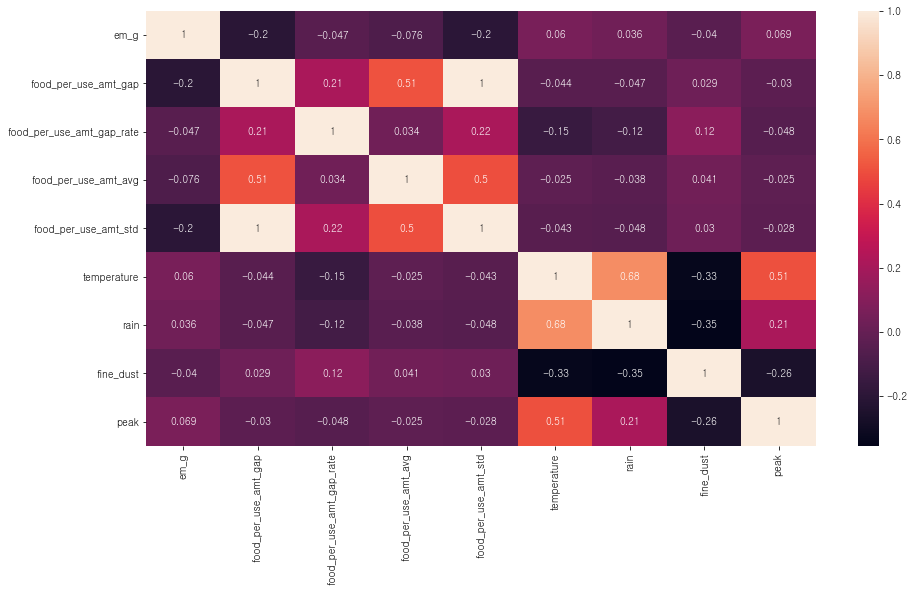

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(i.corr(), annot=True)   

In [ ]:
res = grangercausalitytests(train[['food_per_use_amt_gap_rate', 'em_g']], maxlag=3)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2784  , p=0.5979  , df_denom=1358, df_num=1
ssr based chi2 test:   chi2=0.2790  , p=0.5974  , df=1
likelihood ratio test: chi2=0.2789  , p=0.5974  , df=1
parameter F test:         F=0.2784  , p=0.5979  , df_denom=1358, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.5888  , p=0.5551  , df_denom=1355, df_num=2
ssr based chi2 test:   chi2=1.1819  , p=0.5538  , df=2
likelihood ratio test: chi2=1.1814  , p=0.5539  , df=2
parameter F test:         F=0.5888  , p=0.5551  , df_denom=1355, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.9278  , p=0.4265  , df_denom=1352, df_num=3
ssr based chi2 test:   chi2=2.7980  , p=0.4238  , df=3
likelihood ratio test: chi2=2.7951  , p=0.4243  , df=3
parameter F test:         F=0.9278  , p=0.4265  , df_denom=1352, df_num=3


In [ ]:
res = grangercausalitytests(train[['temperature', 'em_g']], maxlag=3)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0010  , p=0.9748  , df_denom=1358, df_num=1
ssr based chi2 test:   chi2=0.0010  , p=0.9748  , df=1
likelihood ratio test: chi2=0.0010  , p=0.9748  , df=1
parameter F test:         F=0.0010  , p=0.9748  , df_denom=1358, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.0005  , p=0.9995  , df_denom=1355, df_num=2
ssr based chi2 test:   chi2=0.0011  , p=0.9995  , df=2
likelihood ratio test: chi2=0.0011  , p=0.9995  , df=2
parameter F test:         F=0.0005  , p=0.9995  , df_denom=1355, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.0296  , p=0.9931  , df_denom=1352, df_num=3
ssr based chi2 test:   chi2=0.0892  , p=0.9931  , df=3
likelihood ratio test: chi2=0.0892  , p=0.9931  , df=3
parameter F test:         F=0.0296  , p=0.9931  , df_denom=1352, df_num=3


In [ ]:
res = grangercausalitytests(train[['rain', 'em_g']], maxlag=3)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0742  , p=0.7854  , df_denom=1358, df_num=1
ssr based chi2 test:   chi2=0.0743  , p=0.7851  , df=1
likelihood ratio test: chi2=0.0743  , p=0.7851  , df=1
parameter F test:         F=0.0742  , p=0.7854  , df_denom=1358, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.0767  , p=0.9262  , df_denom=1355, df_num=2
ssr based chi2 test:   chi2=0.1540  , p=0.9259  , df=2
likelihood ratio test: chi2=0.1540  , p=0.9259  , df=2
parameter F test:         F=0.0767  , p=0.9262  , df_denom=1355, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.1419  , p=0.9349  , df_denom=1352, df_num=3
ssr based chi2 test:   chi2=0.4278  , p=0.9344  , df=3
likelihood ratio test: chi2=0.4277  , p=0.9345  , df=3
parameter F test:         F=0.1419  , p=0.9349  , df_denom=1352, df_num=3


In [ ]:
res = grangercausalitytests(train[['fine_dust', 'em_g']], maxlag=3)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0663  , p=0.7968  , df_denom=1358, df_num=1
ssr based chi2 test:   chi2=0.0665  , p=0.7966  , df=1
likelihood ratio test: chi2=0.0665  , p=0.7966  , df=1
parameter F test:         F=0.0663  , p=0.7968  , df_denom=1358, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.0792  , p=0.9239  , df_denom=1355, df_num=2
ssr based chi2 test:   chi2=0.1589  , p=0.9236  , df=2
likelihood ratio test: chi2=0.1589  , p=0.9236  , df=2
parameter F test:         F=0.0792  , p=0.9239  , df_denom=1355, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.1167  , p=0.9503  , df_denom=1352, df_num=3
ssr based chi2 test:   chi2=0.3520  , p=0.9500  , df=3
likelihood ratio test: chi2=0.3519  , p=0.9500  , df=3
parameter F test:         F=0.1167  , p=0.9503  , df_denom=1352, df_num=3


In [ ]:
res = grangercausalitytests(train[['peak', 'em_g']], maxlag=3)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0094  , p=0.9227  , df_denom=1358, df_num=1
ssr based chi2 test:   chi2=0.0095  , p=0.9226  , df=1
likelihood ratio test: chi2=0.0095  , p=0.9226  , df=1
parameter F test:         F=0.0094  , p=0.9227  , df_denom=1358, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.0510  , p=0.9503  , df_denom=1355, df_num=2
ssr based chi2 test:   chi2=0.1023  , p=0.9501  , df=2
likelihood ratio test: chi2=0.1023  , p=0.9501  , df=2
parameter F test:         F=0.0510  , p=0.9503  , df_denom=1355, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.0655  , p=0.9781  , df_denom=1352, df_num=3
ssr based chi2 test:   chi2=0.1975  , p=0.9780  , df=3
likelihood ratio test: chi2=0.1975  , p=0.9780  , df=3
parameter F test:         F=0.0655  , p=0.9781  , df_denom=1352, df_num=3


## 4.9 학습데이터와 테스트데이터에서 gap_rate 변수 삭제

In [ ]:
gap_rate = []
for variable in col_list:
    if variable.find('gap_rate') > 0:
        gap_rate.append(variable)
    else:
        pass

In [ ]:
gap_rate

['em_g_gap_rate',
 'resid_reg_pop_gap_rate',
 'foreign_pop_gap_rate',
 'total_pop_gap_rate',
 'f_resid_reg_rate_gap_rate',
 'f_foreign_rate_gap_rate',
 'f_total_rate_gap_rate',
 'floating_resd_rate_gap_rate',
 'floating_pop_cnt_gap_rate',
 'floating_visit_rate_1020_gap_rate',
 'floating_resd_rate_1020_gap_rate',
 'floating_visit_rate_60up_gap_rate',
 'floating_resd_rate_60up_gap_rate',
 'floating_f_visit_rate_gap_rate',
 'floating_f_resd_rate_gap_rate',
 'visit_pop_cnt_gap_rate_sf',
 'rewo_pop_cnt_CVU_lf_gap_rate',
 'rewo_pop_cnt_ETC_lf_gap_rate',
 'visit_pop_cnt_CVU_lf_gap_rate',
 'visit_pop_cnt_ETC_lf_gap_rate',
 'floating_pop_cnt_CVU_lf_gap_rate',
 'floating_pop_cnt_ETC_lf_gap_rate',
 'floating_pop_cnt_lf_gap_rate',
 'visit_rate_CVU_lf_gap_rate',
 'visit_rate_ETC_lf_gap_rate',
 'agri_use_amt_gap_rate',
 'mart_use_amt_gap_rate',
 'deli_use_amt_gap_rate',
 'food_use_amt_gap_rate',
 'agri_per_use_amt_gap_rate',
 'mart_per_use_amt_gap_rate',
 'deli_per_use_amt_gap_rate',
 'food_per_use_

In [ ]:
train.drop(['em_g_gap_rate', 'resid_reg_pop_gap_rate', 'foreign_pop_gap_rate', 'total_pop_gap_rate', 'f_resid_reg_rate_gap_rate',\
 'f_foreign_rate_gap_rate', 'f_total_rate_gap_rate', 'floating_resd_rate_gap_rate', 'floating_pop_cnt_gap_rate',\
 'floating_visit_rate_1020_gap_rate', 'floating_resd_rate_1020_gap_rate', 'floating_visit_rate_60up_gap_rate',\
'floating_resd_rate_60up_gap_rate', 'floating_f_visit_rate_gap_rate', 'floating_f_resd_rate_gap_rate', 'visit_pop_cnt_gap_rate_sf',\
 'rewo_pop_cnt_CVU_lf_gap_rate', 'rewo_pop_cnt_ETC_lf_gap_rate', 'visit_pop_cnt_CVU_lf_gap_rate', 'visit_pop_cnt_ETC_lf_gap_rate',\
 'floating_pop_cnt_CVU_lf_gap_rate', 'floating_pop_cnt_ETC_lf_gap_rate', 'floating_pop_cnt_lf_gap_rate', 'visit_rate_CVU_lf_gap_rate',\
 'visit_rate_ETC_lf_gap_rate', 'agri_use_amt_gap_rate', 'mart_use_amt_gap_rate', 'deli_use_amt_gap_rate', 'food_use_amt_gap_rate',\
 'agri_per_use_amt_gap_rate', 'mart_per_use_amt_gap_rate', 'deli_per_use_amt_gap_rate', 'food_per_use_amt_gap_rate'], axis=1, inplace=True)

In [ ]:
test.drop(['em_g_gap_rate', 'resid_reg_pop_gap_rate', 'foreign_pop_gap_rate', 'total_pop_gap_rate', 'f_resid_reg_rate_gap_rate',\
 'f_foreign_rate_gap_rate', 'f_total_rate_gap_rate', 'floating_resd_rate_gap_rate', 'floating_pop_cnt_gap_rate',\
 'floating_visit_rate_1020_gap_rate', 'floating_resd_rate_1020_gap_rate', 'floating_visit_rate_60up_gap_rate',\
'floating_resd_rate_60up_gap_rate', 'floating_f_visit_rate_gap_rate', 'floating_f_resd_rate_gap_rate', 'visit_pop_cnt_gap_rate_sf',\
 'rewo_pop_cnt_CVU_lf_gap_rate', 'rewo_pop_cnt_ETC_lf_gap_rate', 'visit_pop_cnt_CVU_lf_gap_rate', 'visit_pop_cnt_ETC_lf_gap_rate',\
 'floating_pop_cnt_CVU_lf_gap_rate', 'floating_pop_cnt_ETC_lf_gap_rate', 'floating_pop_cnt_lf_gap_rate', 'visit_rate_CVU_lf_gap_rate',\
 'visit_rate_ETC_lf_gap_rate', 'agri_use_amt_gap_rate', 'mart_use_amt_gap_rate', 'deli_use_amt_gap_rate', 'food_use_amt_gap_rate',\
 'agri_per_use_amt_gap_rate', 'mart_per_use_amt_gap_rate', 'deli_per_use_amt_gap_rate', 'food_per_use_amt_gap_rate'], axis=1, inplace=True)

# 5.gap 이랑 std 중 더 나은 지표 정하기

## 5.1 em_g / resid_reg_pop / total_pop / f_resid_reg_rate / f_foreign_rate / f_total_rate

In [ ]:
a = train[['em_g', 
          'em_g_gap', 'em_g_std',
     'resid_reg_pop_gap', 'resid_reg_pop_std',
     'total_pop_gap', 'total_pop_std',
 'f_resid_reg_rate_gap', 'f_resid_reg_rate_std',
 'f_foreign_rate_gap', 'f_foreign_rate_std',
 'f_total_rate_gap', 'f_total_rate_std',]]

<AxesSubplot:>

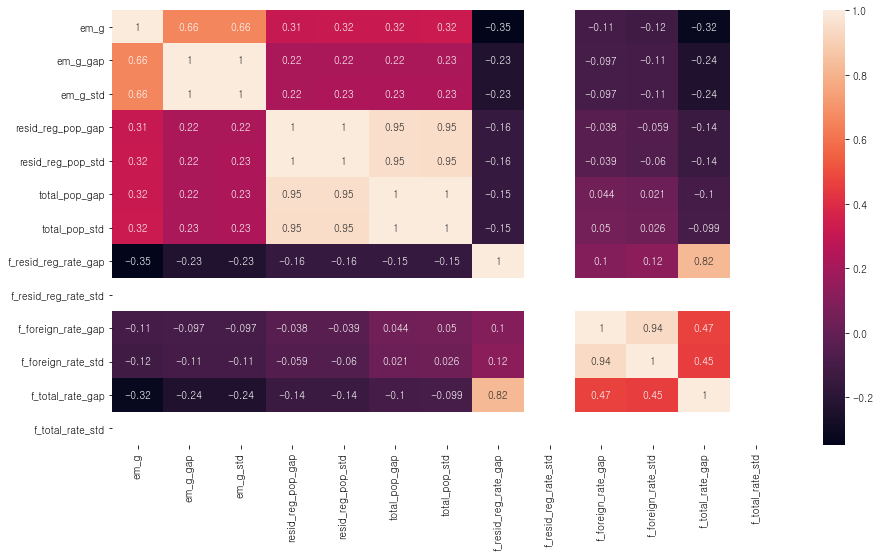

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(a.corr(), annot=True)   

## 5.2 floating_resd_rate / floating_pop_cnt / floating_visit_rate_1020 / floating_resd_rate_1020 / floating_visit_rate_60up / floating_resd_rate_60up

In [ ]:
b = train[['em_g',  
          'floating_resd_rate_gap', 'floating_resd_rate_std',
 'floating_pop_cnt_gap', 'floating_pop_cnt_std',
 'floating_visit_rate_1020_gap', 'floating_visit_rate_1020_std',
 'floating_resd_rate_1020_gap', 'floating_resd_rate_1020_std',
     'floating_visit_rate_60up_gap', 'floating_visit_rate_60up_std',
 'floating_resd_rate_60up_gap', 'floating_resd_rate_60up_std']]

<AxesSubplot:>

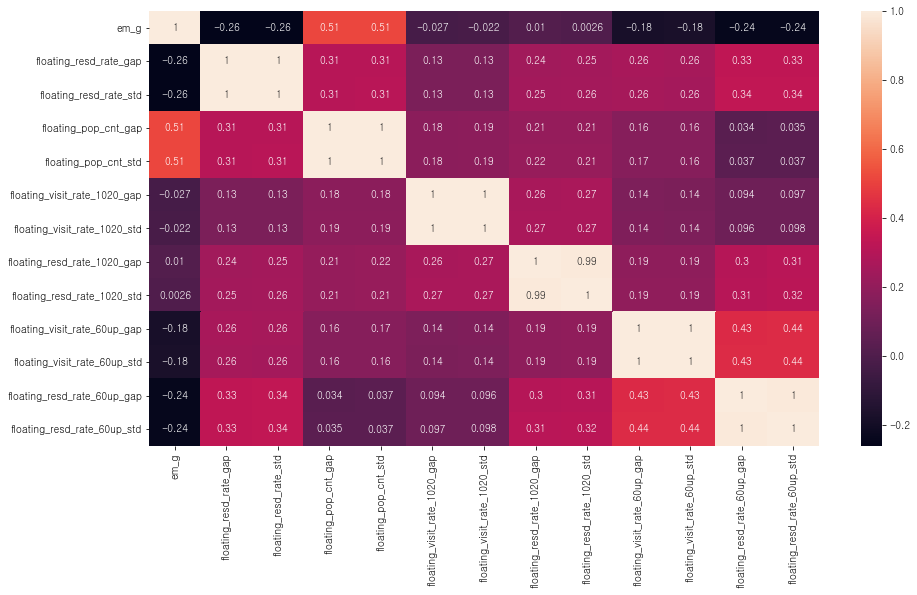

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(b.corr(), annot=True)   

## 5.3 floating_f_visit_rate / floating_f_resd_rate / visit_pop_cnt_sf / rewo_pop_cnt_CVU_lf / rewo_pop_cnt_ETC_lf / visit_pop_cnt_CVU_lf

In [ ]:
c = train[['em_g',  
           'floating_f_visit_rate_gap', 'floating_f_visit_rate_std',
     'floating_f_resd_rate_gap', 'floating_f_resd_rate_std',
     'visit_pop_cnt_gap_sf', 'visit_pop_cnt_std_sf',
     'rewo_pop_cnt_CVU_lf_gap', 'rewo_pop_cnt_CVU_lf_std',
     'rewo_pop_cnt_ETC_lf_gap', 'rewo_pop_cnt_ETC_lf_std',
     'visit_pop_cnt_CVU_lf_gap', 'visit_pop_cnt_CVU_lf_std',]]

<AxesSubplot:>

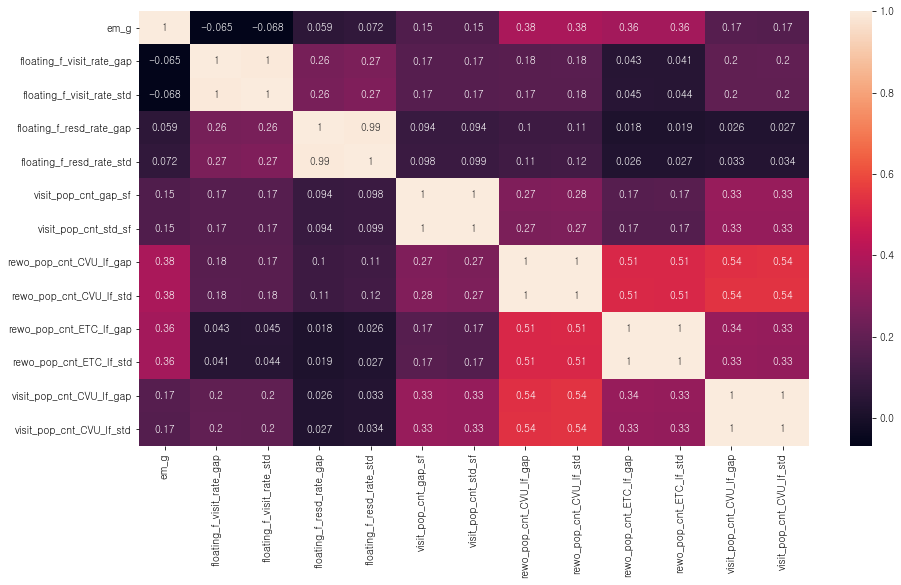

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(c.corr(), annot=True)   

## 5.4 visit_pop_cnt_ETC_lf / floating_pop_cnt_CVU_lf / floating_pop_cnt_ETC_lf / floating_pop_cnt_lf / visit_rate_CVU_lf / visit_rate_ETC_lf

In [ ]:
d = train[['em_g',  
            'visit_pop_cnt_ETC_lf_gap', 'visit_pop_cnt_ETC_lf_std',
     'floating_pop_cnt_CVU_lf_gap', 'floating_pop_cnt_CVU_lf_std',
     'floating_pop_cnt_ETC_lf_gap', 'floating_pop_cnt_ETC_lf_std',
     'floating_pop_cnt_lf_gap', 'floating_pop_cnt_lf_std',
     'visit_rate_CVU_lf_gap', 'visit_rate_CVU_lf_std',
     'visit_rate_ETC_lf_gap', 'visit_rate_ETC_lf_std']]

<AxesSubplot:>

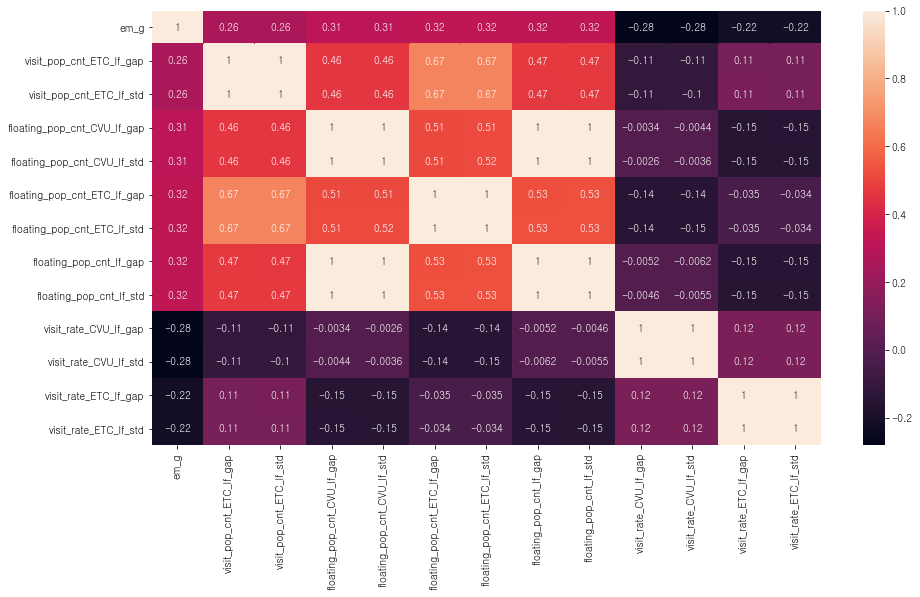

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(d.corr(), annot=True)   

## 5.5 agri_use_amt / mart_use_amt / deli_use_amt / food_use_amt

In [ ]:
e = train[['em_g',  
             'agri_use_amt_gap', 'agri_use_amt_std',
     'mart_use_amt_gap', 'mart_use_amt_std',
     'deli_use_amt_gap', 'deli_use_amt_std',
     'food_use_amt_gap', 'food_use_amt_std']]

<AxesSubplot:>

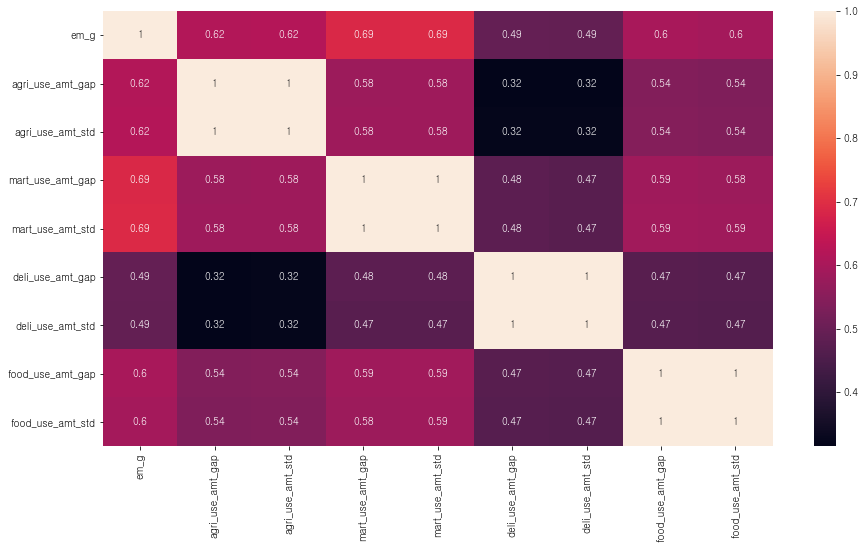

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(e.corr(), annot=True)   

## 5.6 agri_per_use_amt / mart_per_use_amt / deli_per_use_amt / food_per_use_amt_gap

In [ ]:
f = train[['em_g',  
             'agri_per_use_amt_gap', 'agri_per_use_amt_std',
 'mart_per_use_amt_gap', 'mart_per_use_amt_std',
 'deli_per_use_amt_gap', 'deli_per_use_amt_std',
 'food_per_use_amt_gap', 'food_per_use_amt_std',]]

<AxesSubplot:>

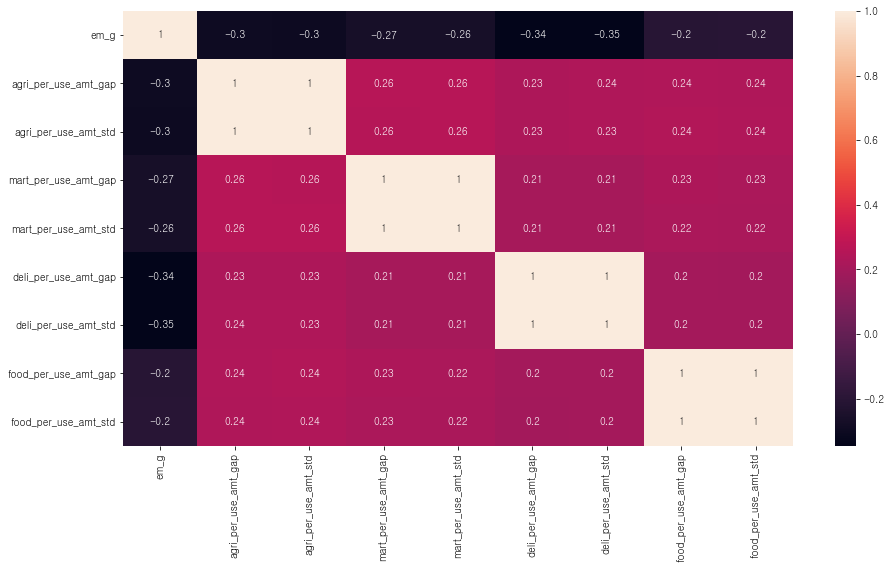

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(f.corr(), annot=True)   

## 5.7 학습데이터와 테스트데이터에서 std 변수 삭제
- std와 gap 사이에 상관관계가 1이고, 
- std와 gap 각각 em_g와의 인과관계를 그레인저 인과관계로 본 결과, 차이가 없었음
- 따라서 std를 삭제함

In [ ]:
std = []
for variable in col_list:
    if variable.find('std') > 0:
        std.append(variable)
    else:
        pass

In [ ]:
std

['em_g_std',
 'resid_reg_pop_std',
 'foreign_pop_std',
 'total_pop_std',
 'f_resid_reg_rate_std',
 'f_foreign_rate_std',
 'f_total_rate_std',
 'floating_resd_rate_std',
 'floating_pop_cnt_std',
 'floating_visit_rate_1020_std',
 'floating_resd_rate_1020_std',
 'floating_visit_rate_60up_std',
 'floating_resd_rate_60up_std',
 'floating_f_visit_rate_std',
 'floating_f_resd_rate_std',
 'visit_pop_cnt_std_sf',
 'rewo_pop_cnt_CVU_lf_std',
 'rewo_pop_cnt_ETC_lf_std',
 'visit_pop_cnt_CVU_lf_std',
 'visit_pop_cnt_ETC_lf_std',
 'floating_pop_cnt_CVU_lf_std',
 'floating_pop_cnt_ETC_lf_std',
 'floating_pop_cnt_lf_std',
 'visit_rate_CVU_lf_std',
 'visit_rate_ETC_lf_std',
 'agri_use_amt_std',
 'mart_use_amt_std',
 'deli_use_amt_std',
 'food_use_amt_std',
 'agri_per_use_amt_std',
 'mart_per_use_amt_std',
 'deli_per_use_amt_std',
 'food_per_use_amt_std']

In [ ]:
train.drop(['em_g_std', 'resid_reg_pop_std', 'foreign_pop_std', 'total_pop_std', 'f_resid_reg_rate_std', 'f_foreign_rate_std',\
 'f_total_rate_std', 'floating_resd_rate_std', 'floating_pop_cnt_std', 'floating_visit_rate_1020_std',\
 'floating_resd_rate_1020_std', 'floating_visit_rate_60up_std', 'floating_resd_rate_60up_std', 'floating_f_visit_rate_std',\
 'floating_f_resd_rate_std', 'visit_pop_cnt_std_sf', 'rewo_pop_cnt_CVU_lf_std',\
 'rewo_pop_cnt_ETC_lf_std', 'visit_pop_cnt_CVU_lf_std', 'visit_pop_cnt_ETC_lf_std',\
 'floating_pop_cnt_CVU_lf_std', 'floating_pop_cnt_ETC_lf_std', 'floating_pop_cnt_lf_std', 'visit_rate_CVU_lf_std', \
'visit_rate_ETC_lf_std', 'agri_use_amt_std', 'mart_use_amt_std', 'deli_use_amt_std', 'food_use_amt_std',\
 'agri_per_use_amt_std', 'mart_per_use_amt_std', 'deli_per_use_amt_std', 'food_per_use_amt_std'], axis=1, inplace=True)

In [ ]:
test.drop(['em_g_std', 'resid_reg_pop_std', 'foreign_pop_std', 'total_pop_std', 'f_resid_reg_rate_std', 'f_foreign_rate_std',\
 'f_total_rate_std', 'floating_resd_rate_std', 'floating_pop_cnt_std', 'floating_visit_rate_1020_std',\
 'floating_resd_rate_1020_std', 'floating_visit_rate_60up_std', 'floating_resd_rate_60up_std', 'floating_f_visit_rate_std',\
 'floating_f_resd_rate_std', 'visit_pop_cnt_std_sf', 'rewo_pop_cnt_CVU_lf_std',\
 'rewo_pop_cnt_ETC_lf_std', 'visit_pop_cnt_CVU_lf_std', 'visit_pop_cnt_ETC_lf_std',\
 'floating_pop_cnt_CVU_lf_std', 'floating_pop_cnt_ETC_lf_std', 'floating_pop_cnt_lf_std', 'visit_rate_CVU_lf_std', \
'visit_rate_ETC_lf_std', 'agri_use_amt_std', 'mart_use_amt_std', 'deli_use_amt_std', 'food_use_amt_std',\
 'agri_per_use_amt_std', 'mart_per_use_amt_std', 'deli_per_use_amt_std', 'food_per_use_amt_std'], axis=1, inplace=True)

In [ ]:
train.columns

Index(['term', 'emd_nm', 'em_g_gap', 'em_g_avg', 'resid_reg_pop_gap',
       'resid_reg_pop_avg', 'total_pop_gap', 'total_pop_avg',
       'f_resid_reg_rate_gap', 'f_resid_reg_rate_avg', 'f_foreign_rate_gap',
       'f_foreign_rate_avg', 'f_total_rate_gap', 'f_total_rate_avg',
       'floating_resd_rate_gap', 'floating_resd_rate_avg',
       'floating_pop_cnt_gap', 'floating_pop_cnt_avg',
       'floating_visit_rate_1020_gap', 'floating_visit_rate_1020_avg',
       'floating_resd_rate_1020_gap', 'floating_resd_rate_1020_avg',
       'floating_visit_rate_60up_gap', 'floating_visit_rate_60up_avg',
       'floating_resd_rate_60up_gap', 'floating_resd_rate_60up_avg',
       'floating_f_visit_rate_gap', 'floating_f_visit_rate_avg',
       'floating_f_resd_rate_gap', 'floating_f_resd_rate_avg', 'visit_pop_cnt',
       'visit_pop_cnt_gap_sf', 'visit_pop_cnt_avg_sf',
       'rewo_pop_cnt_CVU_lf_gap', 'rewo_pop_cnt_CVU_lf_avg',
       'rewo_pop_cnt_ETC_lf_gap', 'rewo_pop_cnt_ETC_lf_avg',
      

# 6. 변수들의 상관계수 확인

In [ ]:
train.columns

Index(['term', 'emd_nm', 'em_g_gap', 'em_g_avg', 'resid_reg_pop_gap',
       'resid_reg_pop_avg', 'total_pop_gap', 'total_pop_avg',
       'f_resid_reg_rate_gap', 'f_resid_reg_rate_avg', 'f_foreign_rate_gap',
       'f_foreign_rate_avg', 'f_total_rate_gap', 'f_total_rate_avg',
       'floating_resd_rate_gap', 'floating_resd_rate_avg',
       'floating_pop_cnt_gap', 'floating_pop_cnt_avg',
       'floating_visit_rate_1020_gap', 'floating_visit_rate_1020_avg',
       'floating_resd_rate_1020_gap', 'floating_resd_rate_1020_avg',
       'floating_visit_rate_60up_gap', 'floating_visit_rate_60up_avg',
       'floating_resd_rate_60up_gap', 'floating_resd_rate_60up_avg',
       'floating_f_visit_rate_gap', 'floating_f_visit_rate_avg',
       'floating_f_resd_rate_gap', 'floating_f_resd_rate_avg', 'visit_pop_cnt',
       'visit_pop_cnt_gap_sf', 'visit_pop_cnt_avg_sf',
       'rewo_pop_cnt_CVU_lf_gap', 'rewo_pop_cnt_CVU_lf_avg',
       'rewo_pop_cnt_ETC_lf_gap', 'rewo_pop_cnt_ETC_lf_avg',
      

In [ ]:
a = train[[ 'em_g',
           'em_g_gap', 'em_g_avg', 'resid_reg_pop_gap',
       'resid_reg_pop_avg', 'total_pop_gap', 'total_pop_avg',
       'f_resid_reg_rate_gap', 'f_resid_reg_rate_avg', 'f_foreign_rate_gap',
       'f_foreign_rate_avg', 'f_total_rate_gap', 'f_total_rate_avg',
       'floating_resd_rate_gap', 'floating_resd_rate_avg',
       'floating_pop_cnt_gap', 'floating_pop_cnt_avg',
       'floating_visit_rate_1020_gap', 'floating_visit_rate_1020_avg',
       'floating_resd_rate_1020_gap', 'floating_resd_rate_1020_avg']]

In [ ]:
b = train[['em_g',
       'floating_visit_rate_60up_gap', 'floating_visit_rate_60up_avg',
       'floating_resd_rate_60up_gap', 'floating_resd_rate_60up_avg',
       'floating_f_visit_rate_gap', 'floating_f_visit_rate_avg',
       'floating_f_resd_rate_gap', 'floating_f_resd_rate_avg', 'visit_pop_cnt',
       'visit_pop_cnt_gap_sf', 'visit_pop_cnt_avg_sf',
       'rewo_pop_cnt_CVU_lf_gap', 'rewo_pop_cnt_CVU_lf_avg',
       'rewo_pop_cnt_ETC_lf_gap', 'rewo_pop_cnt_ETC_lf_avg']]

In [ ]:
c = train[['em_g',
       'visit_pop_cnt_CVU_lf_gap', 'visit_pop_cnt_CVU_lf_avg',
       'visit_pop_cnt_ETC_lf_gap', 'visit_pop_cnt_ETC_lf_avg',
       'floating_pop_cnt_CVU_lf_gap', 'floating_pop_cnt_CVU_lf_avg',
       'floating_pop_cnt_ETC_lf_gap', 'floating_pop_cnt_ETC_lf_avg',
       'floating_pop_cnt_lf_gap', 'floating_pop_cnt_lf_avg',
       'visit_rate_CVU_lf_gap', 'visit_rate_CVU_lf_avg']]

In [ ]:
d = train[['em_g',
       'visit_rate_ETC_lf_gap', 'visit_rate_ETC_lf_avg', 'agri_use_amt_gap',
       'agri_use_amt_avg', 'mart_use_amt_gap', 'mart_use_amt_avg',
       'deli_use_amt_gap', 'deli_use_amt_avg', 'food_use_amt_gap',
       'food_use_amt_avg', 'agri_per_use_amt_gap', 'agri_per_use_amt_avg',
       'mart_per_use_amt_gap', 'mart_per_use_amt_avg', 'deli_per_use_amt_gap',
       'deli_per_use_amt_avg', 'food_per_use_amt_gap', 'food_per_use_amt_avg',
       'temperature', 'rain', 'fine_dust', 'peak']]

<AxesSubplot:>

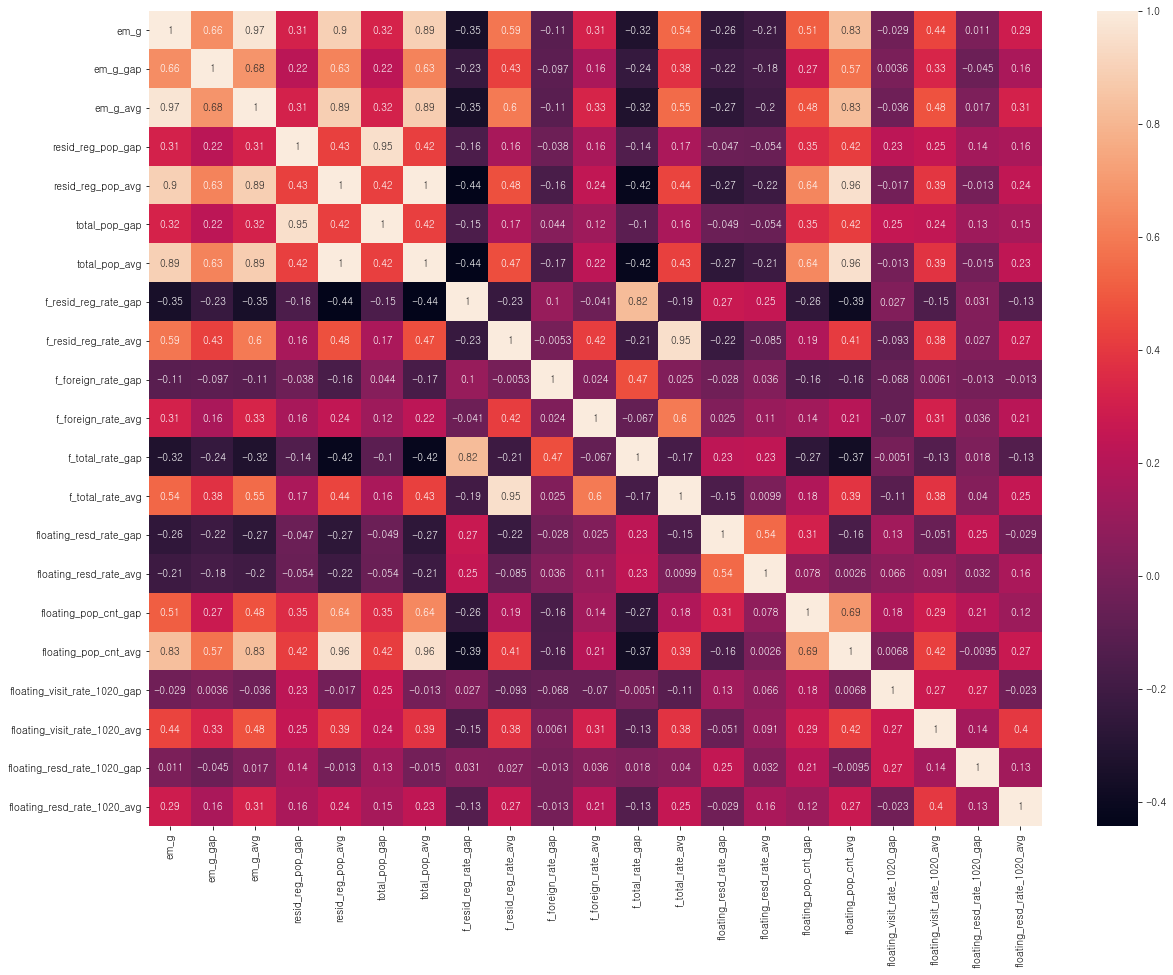

In [ ]:
plt.figure(figsize=(20,15))
sns.heatmap(a.corr(), annot=True)   

<AxesSubplot:>

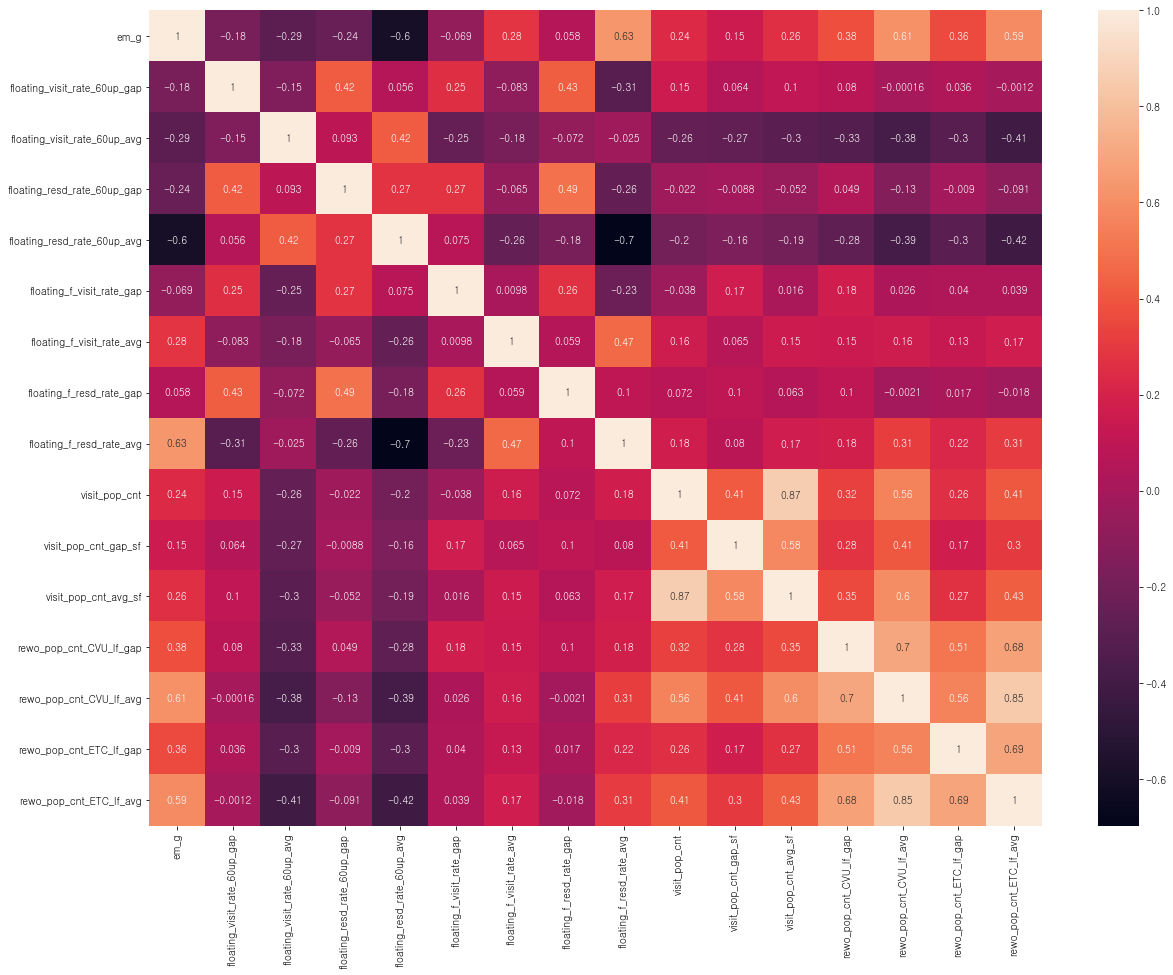

In [ ]:
plt.figure(figsize=(20,15))
sns.heatmap(b.corr(), annot=True)   

<AxesSubplot:>

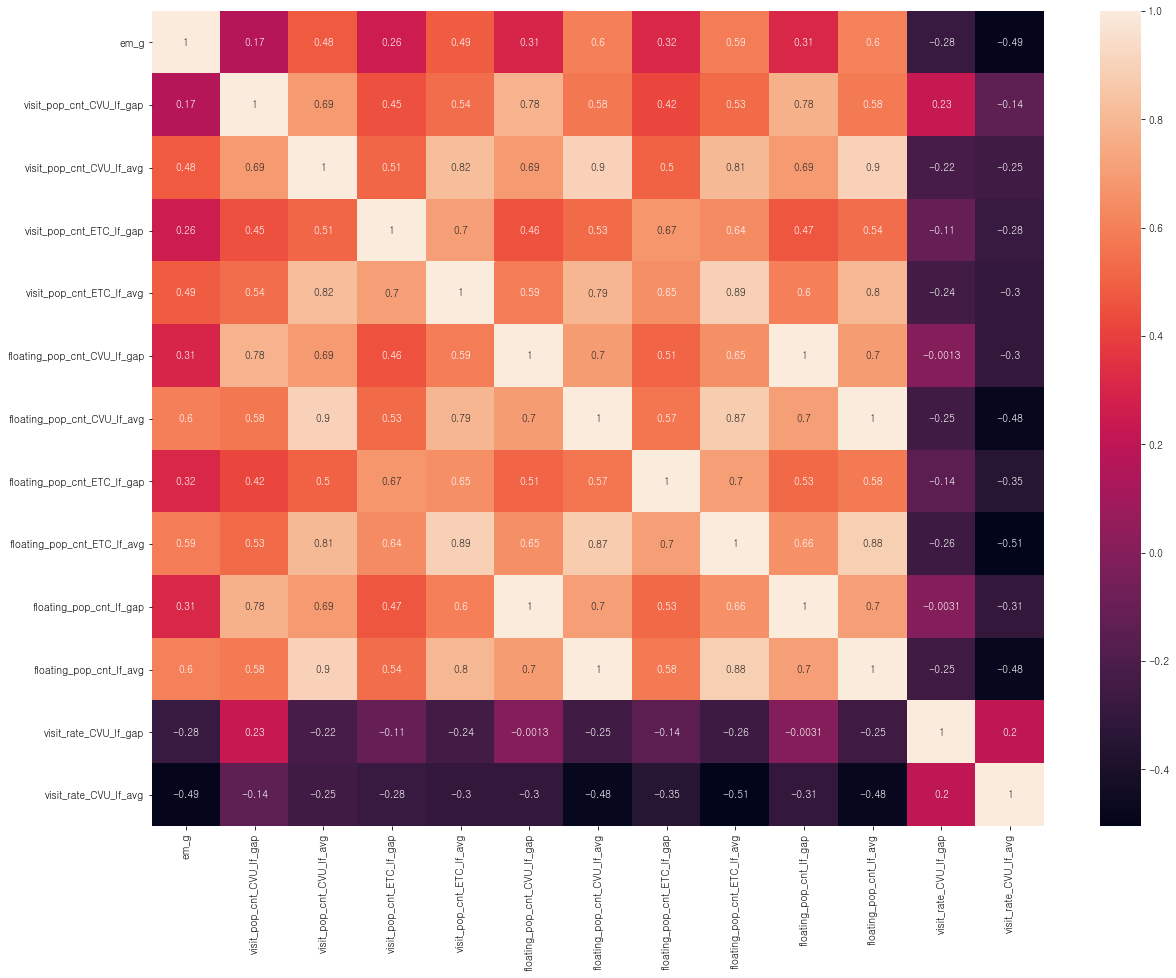

In [ ]:
plt.figure(figsize=(20,15))
sns.heatmap(c.corr(), annot=True)   

<AxesSubplot:>

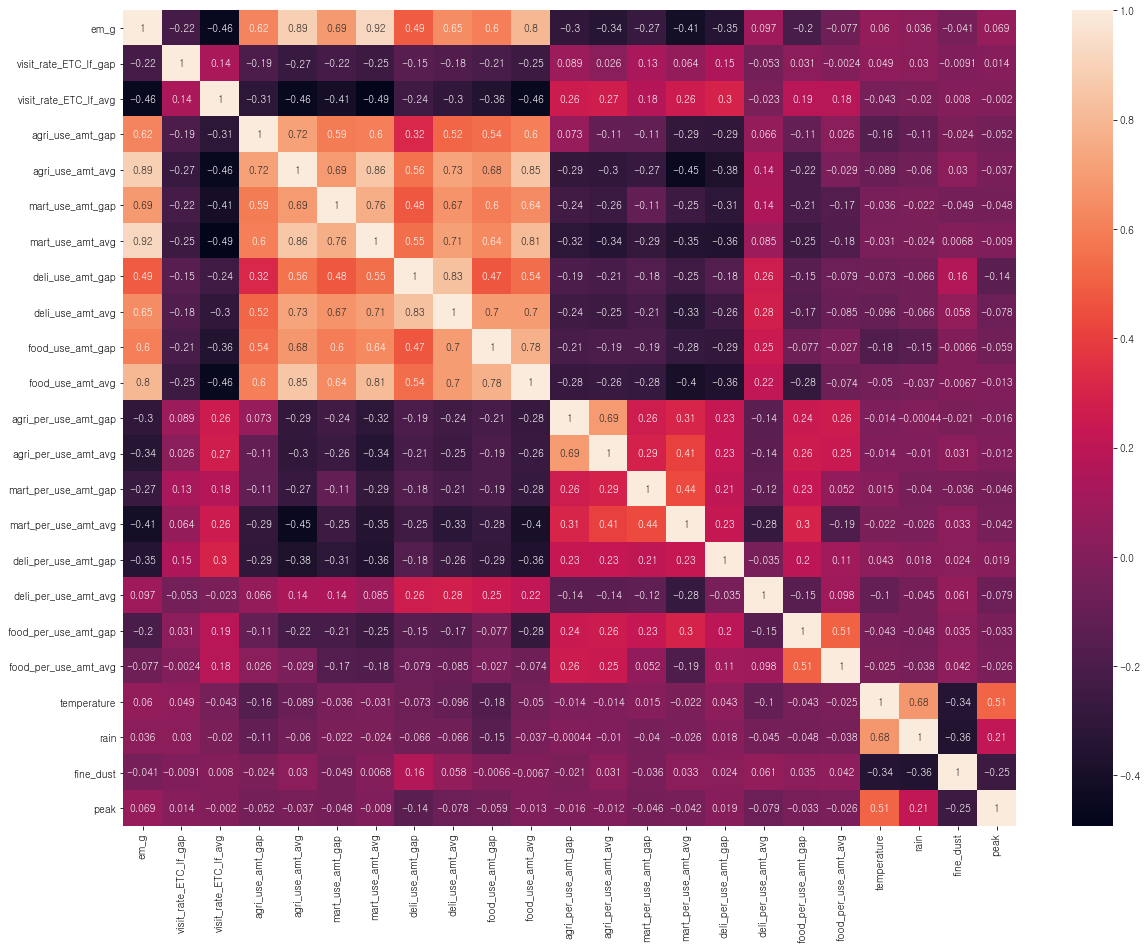

In [ ]:
plt.figure(figsize=(20,15))
sns.heatmap(d.corr(), annot=True)   

# 7. AutoML로 모델 선정 참고

In [ ]:
from pycaret.regression import *
setup_clf = setup(data=data, target='em_g')

,Description,Value
0,session_id,6391
1,Target,em_g
2,Original Data,"(1429, 138)"
3,Missing Values,True
4,Numeric Features,134
5,Categorical Features,2
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(1000, 179)"


In [ ]:
top5 = compare_models(sort='RMSE', n_select=5)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,5378448.9278,65401403577967.3984,8009378.5544,0.9808,0.2187,0.1502,19.4530
et,Extra Trees Regressor,5212808.3746,67510875322200.1562,8125435.6991,0.9799,0.1843,0.1234,0.9780
lightgbm,Light Gradient Boosting Machine,5609740.5342,75929351139883.5938,8620568.4986,0.9766,0.2087,0.1426,0.4110
gbr,Gradient Boosting Regressor,5898165.5312,78742302928583.2969,8794181.9726,0.9763,0.2259,0.1560,1.2090
rf,Random Forest Regressor,6185973.7419,102311719562848.4219,9963164.1259,0.9685,0.2129,0.1449,1.8070
lasso,Lasso Regression,7527392.8000,113647622186598.4062,10632403.8000,0.9657,0.3694,0.2209,0.0250
llar,Lasso Least Angle Regression,7548357.2908,113777213106185.7188,10638057.6849,0.9657,0.3480,0.2219,0.9850
en,Elastic Net,7910560.1500,135731886004633.5938,11576603.1000,0.9599,0.3358,0.2216,0.0320
omp,Orthogonal Matching Pursuit,7727362.9294,138280755150100.3594,11732270.2372,0.9585,0.3165,0.2131,0.0120
knn,K Neighbors Regressor,7864206.3000,142005475947315.1875,11810988.6000,0.9587,0.2743,0.2011,0.0370


# 8. 스케일링 및 X_train, y_train, X_test, y_test 분리

In [ ]:
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler

In [ ]:
X_num = train[[ 'em_g_gap', 'em_g_avg', 'resid_reg_pop_gap','resid_reg_pop_avg', 'total_pop_gap', 'total_pop_avg',
       'f_resid_reg_rate_gap', 'f_resid_reg_rate_avg', 'f_foreign_rate_gap',
       'f_foreign_rate_avg', 'f_total_rate_gap', 'floating_resd_rate_gap', 'floating_resd_rate_avg',
       'floating_pop_cnt_gap', 'floating_pop_cnt_avg', 'floating_visit_rate_1020_gap', 'floating_visit_rate_1020_avg',
       'floating_resd_rate_1020_gap', 'floating_resd_rate_1020_avg','floating_visit_rate_60up_gap', 'floating_visit_rate_60up_avg',
       'floating_resd_rate_60up_gap',   'floating_f_visit_rate_gap', 'floating_f_visit_rate_avg',
        'floating_f_resd_rate_avg','visit_pop_cnt', 'visit_pop_cnt_gap_sf', 'visit_pop_cnt_avg_sf',  'rewo_pop_cnt_CVU_lf_avg',
       'rewo_pop_cnt_ETC_lf_gap', 'rewo_pop_cnt_ETC_lf_avg', 'visit_pop_cnt_CVU_lf_gap', 'visit_pop_cnt_CVU_lf_avg',
       'visit_pop_cnt_ETC_lf_gap', 'visit_pop_cnt_ETC_lf_avg', 'floating_pop_cnt_CVU_lf_gap','floating_pop_cnt_ETC_lf_gap', 
        'floating_pop_cnt_ETC_lf_avg', 'visit_rate_CVU_lf_gap','visit_rate_ETC_lf_gap', 'visit_rate_ETC_lf_avg',
       'agri_use_amt_avg', 'mart_use_amt_gap', 'mart_use_amt_avg', 'deli_use_amt_gap', 'deli_use_amt_avg', 'food_use_amt_gap',
       'food_use_amt_avg', 'agri_per_use_amt_gap', 'agri_per_use_amt_avg', 'mart_per_use_amt_gap', 'mart_per_use_amt_avg', 
        'deli_per_use_amt_gap','deli_per_use_amt_avg', 'temperature', 'rain', 'fine_dust','peak']]

scaler = StandardScaler()
scaler.fit(X_num)
X_train = scaler.transform(X_num)
X_train = pd.DataFrame(X_train, index=X_num.index, columns=X_num.columns)

y_train = train['em_g']

In [ ]:
X_num = test[[ 'em_g_gap', 'em_g_avg', 'resid_reg_pop_gap','resid_reg_pop_avg', 'total_pop_gap', 'total_pop_avg',
       'f_resid_reg_rate_gap', 'f_resid_reg_rate_avg', 'f_foreign_rate_gap',
       'f_foreign_rate_avg', 'f_total_rate_gap', 'floating_resd_rate_gap', 'floating_resd_rate_avg',
       'floating_pop_cnt_gap', 'floating_pop_cnt_avg', 'floating_visit_rate_1020_gap', 'floating_visit_rate_1020_avg',
       'floating_resd_rate_1020_gap', 'floating_resd_rate_1020_avg','floating_visit_rate_60up_gap', 'floating_visit_rate_60up_avg',
       'floating_resd_rate_60up_gap',   'floating_f_visit_rate_gap', 'floating_f_visit_rate_avg',
        'floating_f_resd_rate_avg','visit_pop_cnt', 'visit_pop_cnt_gap_sf', 'visit_pop_cnt_avg_sf',  'rewo_pop_cnt_CVU_lf_avg',
       'rewo_pop_cnt_ETC_lf_gap', 'rewo_pop_cnt_ETC_lf_avg', 'visit_pop_cnt_CVU_lf_gap', 'visit_pop_cnt_CVU_lf_avg',
       'visit_pop_cnt_ETC_lf_gap', 'visit_pop_cnt_ETC_lf_avg', 'floating_pop_cnt_CVU_lf_gap','floating_pop_cnt_ETC_lf_gap', 
        'floating_pop_cnt_ETC_lf_avg', 'visit_rate_CVU_lf_gap','visit_rate_ETC_lf_gap', 'visit_rate_ETC_lf_avg',
       'agri_use_amt_avg', 'mart_use_amt_gap', 'mart_use_amt_avg', 'deli_use_amt_gap', 'deli_use_amt_avg', 'food_use_amt_gap',
       'food_use_amt_avg', 'agri_per_use_amt_gap', 'agri_per_use_amt_avg', 'mart_per_use_amt_gap', 'mart_per_use_amt_avg', 
        'deli_per_use_amt_gap','deli_per_use_amt_avg', 'temperature', 'rain', 'fine_dust','peak']]

scaler = StandardScaler()
scaler.fit(X_num)
X_test = scaler.transform(X_num)
X_test = pd.DataFrame(X_test, index=X_num.index, columns=X_num.columns)

y_test = test['em_g']

후진제거법에 아이디어를 얻어서 삭제 한 변수
- food_per_use_amt_avg
- food_per_use_amt_gap
- agri_use_amt_gap
- visit_rate_CVU_lf_avg
- floating_pop_cnt_lf_avg
- floating_pop_cnt_lf_gap
- floating_pop_cnt_CVU_lf_avg
- rewo_pop_cnt_CVU_lf_gap
- floating_f_resd_rate_gap
- floating_resd_rate_60up_avg
- f_total_rate_avg

# 9. 학습

## 9.1 LGBM

In [ ]:
from lightgbm import LGBMRegressor
model_LGBM = LGBMRegressor(num_iterations=1000)

model_LGBM.fit(X_train, y_train)

pred = model_LGBM.predict(X_test)

print('테스트 점수:', model_LGBM.score(X_test, y_test))
print('MSE 점수:', mean_squared_error(pred, y_test))
print('RMSE 점수:', np.sqrt(mean_squared_error(pred, y_test)))

C:\Users\gram_\anaconda3\envs\min\lib\site-packages\lightgbm\engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


테스트 점수: 0.981322074845866
MSE 점수: 51366784150089.42
RMSE 점수: 7167062.449155122


<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

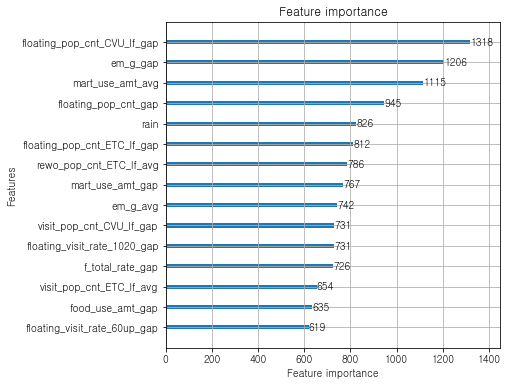

In [ ]:
from lightgbm import plot_importance
f, ax = plt.subplots(figsize=(6,6))
plot_importance(model_LGBM, max_num_features=15, ax=ax)

## 9.2 Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model_RF = RandomForestRegressor(max_depth=6, n_estimators=150)

model_RF.fit(X_train, y_train)

pred = model_RF.predict(X_test)

print('테스트 점수:', model_RF.score(X_test, y_test))
print('MSE 점수:', mean_squared_error(pred, y_test))
print('RMSE 점수:', np.sqrt(mean_squared_error(pred, y_test)))

테스트 점수: 0.9777707708195716
MSE 점수: 61133343650924.89
RMSE 점수: 7818781.468421079


## 9.3 XGB

In [ ]:
from xgboost import XGBRegressor

model_XGB = XGBRegressor(learning_rate=0.125, n_estimators=300, max_depth=2)

model_XGB.fit(X_train, y_train)

pred = model_XGB.predict(X_test)

print('테스트 점수:', model_XGB.score(X_test, y_test))
print('MSE 점수:', mean_squared_error(pred, y_test))
print('RMSE 점수:', np.sqrt(mean_squared_error(pred, y_test)))

[21:31:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
테스트 점수: 0.975342547928517
MSE 점수: 67811280310581.17
RMSE 점수: 8234760.488962698


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

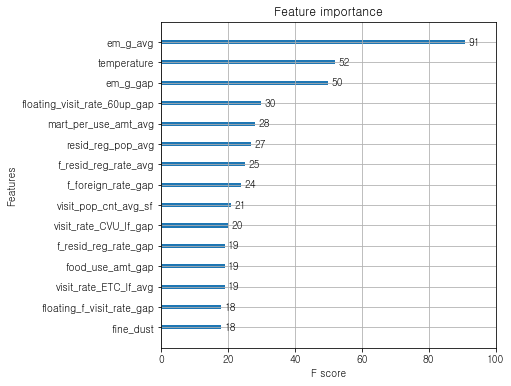

In [ ]:
from xgboost import plot_importance
f, ax = plt.subplots(figsize=(6,6))
plot_importance(model_XGB, max_num_features=15, ax=ax)

## 9.4 Adaboost

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

ada = AdaBoostRegressor( n_estimators = 500, learning_rate = 0.1, random_state = 1)

ada = ada.fit(X_train, y_train)

print('테스트 점수:', ada.score(X_test, y_test))
print('MSE 점수:', mean_squared_error(pred, y_test))
print('RMSE 점수:', np.sqrt(mean_squared_error(pred, y_test)))

테스트 점수: 0.9595781558937208
MSE 점수: 67811280310581.17
RMSE 점수: 8234760.488962698


## 9.5 Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
model_GB = GradientBoostingRegressor(n_estimators=140, learning_rate=0.02, max_depth=5)


model_GB.fit(X_train, y_train)

pred = model_GB.predict(X_test)

print('테스트 점수:', model_GB.score(X_test, y_test))
print('MSE 점수:', mean_squared_error(pred, y_test))
print('RMSE 점수:', np.sqrt(mean_squared_error(pred, y_test)))

테스트 점수: 0.9779303109502779
MSE 점수: 60694587022999.695
RMSE 점수: 7790673.078945085


## 9.6 ExtraTree

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor

model_ET = ExtraTreesRegressor(n_estimators=100, max_depth=5)

model_ET.fit(X_train, y_train)

pred = model_ET.predict(X_test)

print('테스트 점수:', model_ET.score(X_test, y_test))
print('MSE 점수:', mean_squared_error(pred, y_test))
print('RMSE 점수:', np.sqrt(mean_squared_error(pred, y_test)))

테스트 점수: 0.976446182677296
MSE 점수: 64776137624589.76
RMSE 점수: 8048362.418814759


## 9.7 Voting 앙상블 학습

In [ ]:
from sklearn.ensemble import VotingRegressor

voting_clf = VotingRegressor(estimators=[('lgbm1',model_LGBM),('lgbm2',model_LGBM), ('lgbm3',model_LGBM), ('xgb',model_XGB)])

In [ ]:
voting_clf.fit(X_train, y_train)

[21:31:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


VotingRegressor(estimators=[('lgbm1',
                             LGBMRegressor(boosting_type='gbdt',
                                           class_weight=None,
                                           colsample_bytree=1.0,
                                           importance_type='split',
                                           learning_rate=0.1, max_depth=-1,
                                           min_child_samples=20,
                                           min_child_weight=0.001,
                                           min_split_gain=0.0, n_estimators=100,
                                           n_jobs=-1, num_iterations=1000,
                                           num_leaves=31, objective=None,
                                           random_state=None, reg_alpha=0.0,
                                           reg_lambda=0....
                                          colsample_bynode=1,
                                          colsample_bytree=1, gam

In [ ]:
pred = voting_clf.predict(X_test)

print('테스트 점수:', voting_clf.score(X_test, y_test))
print('MSE 점수:', mean_squared_error(pred, y_test))
print('RMSE 점수:', np.sqrt(mean_squared_error(pred, y_test)))

테스트 점수: 0.9817488918149248
MSE 점수: 50192980585704.45
RMSE 점수: 7084700.458431849
